<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('./heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [4]:
# checking for null values
df.isnull().sum()

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(270, 14)

In [7]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [8]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [10]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [11]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [25]:
import torch
from torch.utils.data import DataLoader, TensorDataset

def train_test_dataloader(x_train, y_train, x_val, y_val, batch_size=32):
    # Convert to PyTorch tensors
    x_train = np.array(x_train, dtype=np.float32)
    x_train = torch.from_numpy(x_train).float()
    y_train = np.array(y_train, dtype=np.float32)
    y_train = torch.from_numpy(y_train).long()

    x_val = np.array(x_val, dtype=np.float32)
    x_val = torch.from_numpy(x_val).float()
    y_val = np.array(y_val, dtype=np.float32)
    y_val = torch.from_numpy(y_val).long()

    # Create datasets
    train_dataset = TensorDataset(x_train, y_train)
    val_dataset = TensorDataset(x_val, y_val)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')
    return train_loader, val_loader

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=np.float32)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=np.float32)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=np.float32)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=np.float32)
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


C:\Users\Yicheng\AppData\Local\Temp\ipykernel_11672\2946756783.py:28: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x_train = np.array(x_train, dtype=np.float32)
C:\Users\Yicheng\AppData\Local\Temp\ipykernel_11672\2946756783.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train = np.array(y_train, dtype=np.float32)
C:\Users\Yicheng\AppData\Local\Temp\ipykernel_11672\2946756783.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passi

## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [256]:
import random
import numpy as np
import torch

def set_seed(seed=42):
    random.seed(seed)  # 設定 Python 內建隨機數種子
    np.random.seed(seed)  # 設定 NumPy 隨機種子
    torch.manual_seed(seed)  # 設定 PyTorch 隨機種子
    torch.cuda.manual_seed(seed)  # 設定 CUDA 隨機種子
    torch.cuda.manual_seed_all(seed)  # 多 GPU 情況下設置所有 CUDA 設備的種子
    torch.backends.cudnn.deterministic = True  # 讓 CNN 的結果可重現
    torch.backends.cudnn.benchmark = False  # 可能會降低訓練速度，但保證結果一致

# 設定隨機種子
set_seed(42)

In [257]:
# Hyperparameters
epochs = 2000
lr = 0.0001
model = Model()
batch_size = 32

train_loader, val_loader = train_test_dataloader(x_train, y_train, x_val, y_val, batch_size=batch_size)

Number of samples in train and validation are 189 and 81.


C:\Users\Yicheng\AppData\Local\Temp\ipykernel_11672\2946756783.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x_train = np.array(x_train, dtype=np.float32)
C:\Users\Yicheng\AppData\Local\Temp\ipykernel_11672\2946756783.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train = np.array(y_train, dtype=np.float32)
C:\Users\Yicheng\AppData\Local\Temp\ipykernel_11672\2946756783.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing

In [258]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

best_val_loss = float('inf')
best_val_acc = -1

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 1/2000, Train loss: 0.8753, Train acc: 60.8466%, Val loss: 0.5828, Val acc: 70.3704%, Best Val loss: 0.5828 Best Val acc: 70.37%


  0%|          | 9/2000 [00:00<00:49, 39.98it/s]

Epoch 2/2000, Train loss: 0.6632, Train acc: 70.8995%, Val loss: 0.6555, Val acc: 62.9630%, Best Val loss: 0.5828 Best Val acc: 70.37%
Epoch 3/2000, Train loss: 0.6023, Train acc: 67.7249%, Val loss: 0.5713, Val acc: 71.6049%, Best Val loss: 0.5713 Best Val acc: 71.60%
Epoch 4/2000, Train loss: 0.5848, Train acc: 67.7249%, Val loss: 0.5933, Val acc: 64.1975%, Best Val loss: 0.5713 Best Val acc: 71.60%
Epoch 5/2000, Train loss: 0.5780, Train acc: 67.7249%, Val loss: 0.5691, Val acc: 70.3704%, Best Val loss: 0.5691 Best Val acc: 71.60%
Epoch 6/2000, Train loss: 0.5776, Train acc: 68.2540%, Val loss: 0.5654, Val acc: 72.8395%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 7/2000, Train loss: 0.5741, Train acc: 71.4286%, Val loss: 0.6648, Val acc: 59.2593%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 8/2000, Train loss: 0.6188, Train acc: 64.0212%, Val loss: 0.6671, Val acc: 61.7284%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 9/2000, Train loss: 0.7105, Train acc: 65.0794%, 

  1%|          | 18/2000 [00:00<00:48, 40.63it/s]

Epoch 11/2000, Train loss: 0.5953, Train acc: 65.6085%, Val loss: 0.5680, Val acc: 67.9012%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 12/2000, Train loss: 0.5653, Train acc: 71.9577%, Val loss: 0.5740, Val acc: 66.6667%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 13/2000, Train loss: 0.5669, Train acc: 66.6667%, Val loss: 0.7475, Val acc: 56.7901%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 14/2000, Train loss: 0.5901, Train acc: 67.7249%, Val loss: 0.5987, Val acc: 71.6049%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 15/2000, Train loss: 0.5730, Train acc: 68.7831%, Val loss: 0.7432, Val acc: 56.7901%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 16/2000, Train loss: 0.5741, Train acc: 69.3122%, Val loss: 0.5672, Val acc: 67.9012%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 17/2000, Train loss: 0.5557, Train acc: 70.3704%, Val loss: 0.5932, Val acc: 62.9630%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 18/2000, Train loss: 0.5339, Train acc: 73

  1%|          | 23/2000 [00:00<00:48, 40.35it/s]

Epoch 20/2000, Train loss: 0.5790, Train acc: 65.0794%, Val loss: 0.5712, Val acc: 70.3704%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 21/2000, Train loss: 0.5568, Train acc: 68.7831%, Val loss: 0.6590, Val acc: 61.7284%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 22/2000, Train loss: 0.5500, Train acc: 70.8995%, Val loss: 0.5828, Val acc: 65.4321%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 23/2000, Train loss: 0.5481, Train acc: 67.7249%, Val loss: 0.5803, Val acc: 71.6049%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 24/2000, Train loss: 0.5995, Train acc: 70.3704%, Val loss: 0.5706, Val acc: 70.3704%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 25/2000, Train loss: 0.5681, Train acc: 67.1958%, Val loss: 0.7079, Val acc: 59.2593%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 26/2000, Train loss: 0.5474, Train acc: 70.8995%, Val loss: 0.5823, Val acc: 69.1358%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 27/2000, Train loss: 0.5098, Train acc: 70

  2%|▏         | 33/2000 [00:00<00:47, 41.44it/s]

Epoch 28/2000, Train loss: 0.5488, Train acc: 70.8995%, Val loss: 0.5716, Val acc: 70.3704%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 29/2000, Train loss: 0.5279, Train acc: 70.8995%, Val loss: 0.5827, Val acc: 66.6667%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 30/2000, Train loss: 0.5212, Train acc: 75.1323%, Val loss: 0.6383, Val acc: 62.9630%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 31/2000, Train loss: 0.5356, Train acc: 70.3704%, Val loss: 0.5708, Val acc: 69.1358%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 32/2000, Train loss: 0.5378, Train acc: 69.8413%, Val loss: 0.5662, Val acc: 67.9012%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 33/2000, Train loss: 0.5168, Train acc: 73.0159%, Val loss: 0.6617, Val acc: 61.7284%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 34/2000, Train loss: 0.5276, Train acc: 69.3122%, Val loss: 0.5740, Val acc: 69.1358%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 35/2000, Train loss: 0.5017, Train acc: 73

  2%|▏         | 43/2000 [00:01<00:45, 43.11it/s]

Epoch 37/2000, Train loss: 0.5265, Train acc: 70.8995%, Val loss: 0.5753, Val acc: 65.4321%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 38/2000, Train loss: 0.5263, Train acc: 75.1323%, Val loss: 0.5793, Val acc: 64.1975%, Best Val loss: 0.5654 Best Val acc: 72.84%
Epoch 39/2000, Train loss: 0.4998, Train acc: 76.1905%, Val loss: 0.5623, Val acc: 72.8395%, Best Val loss: 0.5623 Best Val acc: 72.84%
Epoch 40/2000, Train loss: 0.5073, Train acc: 73.0159%, Val loss: 0.6126, Val acc: 64.1975%, Best Val loss: 0.5623 Best Val acc: 72.84%
Epoch 41/2000, Train loss: 0.5083, Train acc: 75.6614%, Val loss: 0.6267, Val acc: 61.7284%, Best Val loss: 0.5623 Best Val acc: 72.84%
Epoch 42/2000, Train loss: 0.5353, Train acc: 68.7831%, Val loss: 0.5669, Val acc: 70.3704%, Best Val loss: 0.5623 Best Val acc: 72.84%
Epoch 43/2000, Train loss: 0.5112, Train acc: 71.9577%, Val loss: 0.5650, Val acc: 70.3704%, Best Val loss: 0.5623 Best Val acc: 72.84%
Epoch 44/2000, Train loss: 0.4997, Train acc: 75

  3%|▎         | 53/2000 [00:01<00:45, 42.71it/s]

Epoch 47/2000, Train loss: 0.5145, Train acc: 75.1323%, Val loss: 0.7002, Val acc: 60.4938%, Best Val loss: 0.5589 Best Val acc: 72.84%
Epoch 48/2000, Train loss: 0.6195, Train acc: 63.4921%, Val loss: 0.5865, Val acc: 66.6667%, Best Val loss: 0.5589 Best Val acc: 72.84%
Epoch 49/2000, Train loss: 0.5141, Train acc: 70.8995%, Val loss: 0.6854, Val acc: 61.7284%, Best Val loss: 0.5589 Best Val acc: 72.84%
Epoch 50/2000, Train loss: 0.5067, Train acc: 74.6032%, Val loss: 0.5573, Val acc: 71.6049%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 51/2000, Train loss: 0.5025, Train acc: 74.6032%, Val loss: 0.6803, Val acc: 61.7284%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 52/2000, Train loss: 0.4875, Train acc: 73.0159%, Val loss: 0.5616, Val acc: 72.8395%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 53/2000, Train loss: 0.4798, Train acc: 75.6614%, Val loss: 0.5861, Val acc: 67.9012%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 54/2000, Train loss: 0.4787, Train acc: 74

  3%|▎         | 63/2000 [00:01<00:46, 42.05it/s]

Epoch 56/2000, Train loss: 0.5222, Train acc: 73.5450%, Val loss: 0.6212, Val acc: 61.7284%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 57/2000, Train loss: 0.5068, Train acc: 74.0741%, Val loss: 0.5575, Val acc: 71.6049%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 58/2000, Train loss: 0.4793, Train acc: 75.1323%, Val loss: 0.5625, Val acc: 69.1358%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 59/2000, Train loss: 0.4741, Train acc: 76.7196%, Val loss: 0.5575, Val acc: 70.3704%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 60/2000, Train loss: 0.4717, Train acc: 76.1905%, Val loss: 0.5767, Val acc: 70.3704%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 61/2000, Train loss: 0.4870, Train acc: 78.8360%, Val loss: 0.5599, Val acc: 70.3704%, Best Val loss: 0.5573 Best Val acc: 72.84%
Epoch 62/2000, Train loss: 0.5080, Train acc: 73.0159%, Val loss: 0.5549, Val acc: 74.0741%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 63/2000, Train loss: 0.4817, Train acc: 76

  4%|▎         | 73/2000 [00:01<00:44, 42.84it/s]

Epoch 65/2000, Train loss: 0.4891, Train acc: 71.4286%, Val loss: 0.6311, Val acc: 64.1975%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 66/2000, Train loss: 0.4928, Train acc: 71.9577%, Val loss: 0.6668, Val acc: 61.7284%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 67/2000, Train loss: 0.4861, Train acc: 76.7196%, Val loss: 0.5595, Val acc: 71.6049%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 68/2000, Train loss: 0.5461, Train acc: 72.4868%, Val loss: 0.6176, Val acc: 65.4321%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 69/2000, Train loss: 0.5575, Train acc: 68.2540%, Val loss: 0.5811, Val acc: 69.1358%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 70/2000, Train loss: 0.5395, Train acc: 70.8995%, Val loss: 0.8532, Val acc: 59.2593%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 71/2000, Train loss: 0.5640, Train acc: 71.4286%, Val loss: 0.5800, Val acc: 66.6667%, Best Val loss: 0.5549 Best Val acc: 74.07%
Epoch 72/2000, Train loss: 0.5132, Train acc: 75

  4%|▍         | 83/2000 [00:01<00:44, 42.95it/s]

Epoch 75/2000, Train loss: 0.4655, Train acc: 78.8360%, Val loss: 0.6520, Val acc: 61.7284%, Best Val loss: 0.5515 Best Val acc: 74.07%
Epoch 76/2000, Train loss: 0.4916, Train acc: 74.0741%, Val loss: 0.5530, Val acc: 71.6049%, Best Val loss: 0.5515 Best Val acc: 74.07%
Epoch 77/2000, Train loss: 0.4892, Train acc: 73.5450%, Val loss: 0.5502, Val acc: 71.6049%, Best Val loss: 0.5502 Best Val acc: 74.07%
Epoch 78/2000, Train loss: 0.4452, Train acc: 80.4233%, Val loss: 0.6362, Val acc: 62.9630%, Best Val loss: 0.5502 Best Val acc: 74.07%
Epoch 79/2000, Train loss: 0.4935, Train acc: 75.6614%, Val loss: 0.5559, Val acc: 71.6049%, Best Val loss: 0.5502 Best Val acc: 74.07%
Epoch 80/2000, Train loss: 0.4521, Train acc: 77.2487%, Val loss: 0.5516, Val acc: 72.8395%, Best Val loss: 0.5502 Best Val acc: 74.07%
Epoch 81/2000, Train loss: 0.4597, Train acc: 78.8360%, Val loss: 0.5536, Val acc: 71.6049%, Best Val loss: 0.5502 Best Val acc: 74.07%
Epoch 82/2000, Train loss: 0.4800, Train acc: 73

  4%|▍         | 88/2000 [00:02<00:44, 42.81it/s]

Epoch 84/2000, Train loss: 0.4685, Train acc: 76.1905%, Val loss: 0.5499, Val acc: 70.3704%, Best Val loss: 0.5499 Best Val acc: 74.07%
Epoch 85/2000, Train loss: 0.4607, Train acc: 75.6614%, Val loss: 0.5527, Val acc: 72.8395%, Best Val loss: 0.5499 Best Val acc: 74.07%
Epoch 86/2000, Train loss: 0.4653, Train acc: 77.2487%, Val loss: 0.7446, Val acc: 60.4938%, Best Val loss: 0.5499 Best Val acc: 74.07%
Epoch 87/2000, Train loss: 0.5115, Train acc: 71.4286%, Val loss: 0.5967, Val acc: 64.1975%, Best Val loss: 0.5499 Best Val acc: 74.07%
Epoch 88/2000, Train loss: 0.4843, Train acc: 75.6614%, Val loss: 0.5587, Val acc: 72.8395%, Best Val loss: 0.5499 Best Val acc: 74.07%
Epoch 89/2000, Train loss: 0.4383, Train acc: 80.4233%, Val loss: 0.5497, Val acc: 74.0741%, Best Val loss: 0.5497 Best Val acc: 74.07%
Epoch 90/2000, Train loss: 0.4447, Train acc: 78.8360%, Val loss: 0.5755, Val acc: 74.0741%, Best Val loss: 0.5497 Best Val acc: 74.07%
Epoch 91/2000, Train loss: 0.4461, Train acc: 80

  5%|▍         | 98/2000 [00:02<00:44, 42.71it/s]

Epoch 93/2000, Train loss: 0.4539, Train acc: 74.0741%, Val loss: 0.5468, Val acc: 69.1358%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 94/2000, Train loss: 0.4600, Train acc: 75.6614%, Val loss: 0.5650, Val acc: 65.4321%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 95/2000, Train loss: 0.5092, Train acc: 76.1905%, Val loss: 0.8102, Val acc: 60.4938%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 96/2000, Train loss: 0.5315, Train acc: 72.4868%, Val loss: 0.5550, Val acc: 72.8395%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 97/2000, Train loss: 0.5963, Train acc: 69.8413%, Val loss: 0.6333, Val acc: 64.1975%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 98/2000, Train loss: 0.4953, Train acc: 74.6032%, Val loss: 0.6308, Val acc: 62.9630%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 99/2000, Train loss: 0.4825, Train acc: 77.7778%, Val loss: 0.6330, Val acc: 62.9630%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 100/2000, Train loss: 0.4772, Train acc: 7

  5%|▌         | 108/2000 [00:02<00:45, 41.86it/s]

Epoch 103/2000, Train loss: 0.4371, Train acc: 77.2487%, Val loss: 0.5601, Val acc: 64.1975%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 104/2000, Train loss: 0.4611, Train acc: 74.0741%, Val loss: 0.7541, Val acc: 60.4938%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 105/2000, Train loss: 0.4670, Train acc: 77.2487%, Val loss: 0.5497, Val acc: 70.3704%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 106/2000, Train loss: 0.4353, Train acc: 77.7778%, Val loss: 0.5474, Val acc: 72.8395%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 107/2000, Train loss: 0.4314, Train acc: 78.8360%, Val loss: 0.6040, Val acc: 65.4321%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 108/2000, Train loss: 0.4546, Train acc: 75.1323%, Val loss: 0.5608, Val acc: 66.6667%, Best Val loss: 0.5468 Best Val acc: 75.31%
Epoch 109/2000, Train loss: 0.4663, Train acc: 76.1905%, Val loss: 0.5425, Val acc: 72.8395%, Best Val loss: 0.5425 Best Val acc: 75.31%
Epoch 110/2000, Train loss: 0.4268, Train

  6%|▌         | 118/2000 [00:02<00:44, 42.00it/s]

Epoch 112/2000, Train loss: 0.4167, Train acc: 81.4815%, Val loss: 0.5536, Val acc: 75.3086%, Best Val loss: 0.5389 Best Val acc: 75.31%
Epoch 113/2000, Train loss: 0.4259, Train acc: 78.8360%, Val loss: 0.5443, Val acc: 72.8395%, Best Val loss: 0.5389 Best Val acc: 75.31%
Epoch 114/2000, Train loss: 0.4128, Train acc: 81.4815%, Val loss: 0.5953, Val acc: 71.6049%, Best Val loss: 0.5389 Best Val acc: 75.31%
Epoch 115/2000, Train loss: 0.4198, Train acc: 80.4233%, Val loss: 0.5438, Val acc: 71.6049%, Best Val loss: 0.5389 Best Val acc: 75.31%
Epoch 116/2000, Train loss: 0.4194, Train acc: 80.4233%, Val loss: 0.6142, Val acc: 66.6667%, Best Val loss: 0.5389 Best Val acc: 75.31%
Epoch 117/2000, Train loss: 0.4291, Train acc: 80.4233%, Val loss: 0.5547, Val acc: 75.3086%, Best Val loss: 0.5389 Best Val acc: 75.31%
Epoch 118/2000, Train loss: 0.4144, Train acc: 82.0106%, Val loss: 0.5535, Val acc: 76.5432%, Best Val loss: 0.5389 Best Val acc: 76.54%
Epoch 119/2000, Train loss: 0.4134, Train

  6%|▋         | 128/2000 [00:03<00:45, 41.29it/s]

Epoch 122/2000, Train loss: 0.5247, Train acc: 70.3704%, Val loss: 0.5999, Val acc: 62.9630%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 123/2000, Train loss: 0.4839, Train acc: 72.4868%, Val loss: 0.5413, Val acc: 74.0741%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 124/2000, Train loss: 0.5301, Train acc: 67.7249%, Val loss: 0.8606, Val acc: 60.4938%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 125/2000, Train loss: 0.5406, Train acc: 69.8413%, Val loss: 0.5851, Val acc: 66.6667%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 126/2000, Train loss: 0.4911, Train acc: 71.4286%, Val loss: 0.5410, Val acc: 71.6049%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 127/2000, Train loss: 0.4387, Train acc: 77.7778%, Val loss: 0.6832, Val acc: 62.9630%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 128/2000, Train loss: 0.4562, Train acc: 75.1323%, Val loss: 0.5579, Val acc: 66.6667%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 129/2000, Train loss: 0.4038, Train

  7%|▋         | 138/2000 [00:03<00:44, 41.77it/s]

Epoch 131/2000, Train loss: 0.4269, Train acc: 77.2487%, Val loss: 0.5927, Val acc: 69.1358%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 132/2000, Train loss: 0.4164, Train acc: 79.8942%, Val loss: 0.5506, Val acc: 76.5432%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 133/2000, Train loss: 0.4225, Train acc: 79.8942%, Val loss: 0.5386, Val acc: 70.3704%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 134/2000, Train loss: 0.4032, Train acc: 80.9524%, Val loss: 0.5600, Val acc: 74.0741%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 135/2000, Train loss: 0.4012, Train acc: 83.0688%, Val loss: 0.5528, Val acc: 75.3086%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 136/2000, Train loss: 0.3975, Train acc: 82.5397%, Val loss: 0.5421, Val acc: 75.3086%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 137/2000, Train loss: 0.3946, Train acc: 82.5397%, Val loss: 0.5921, Val acc: 72.8395%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 138/2000, Train loss: 0.4315, Train

  7%|▋         | 148/2000 [00:03<00:45, 40.95it/s]

Epoch 140/2000, Train loss: 0.5109, Train acc: 70.8995%, Val loss: 0.5710, Val acc: 76.5432%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 141/2000, Train loss: 0.4034, Train acc: 80.9524%, Val loss: 0.5560, Val acc: 75.3086%, Best Val loss: 0.5370 Best Val acc: 76.54%
Epoch 142/2000, Train loss: 0.3948, Train acc: 82.5397%, Val loss: 0.5341, Val acc: 71.6049%, Best Val loss: 0.5341 Best Val acc: 76.54%
Epoch 143/2000, Train loss: 0.4066, Train acc: 80.9524%, Val loss: 0.5397, Val acc: 76.5432%, Best Val loss: 0.5341 Best Val acc: 76.54%
Epoch 144/2000, Train loss: 0.4012, Train acc: 83.0688%, Val loss: 0.6460, Val acc: 64.1975%, Best Val loss: 0.5341 Best Val acc: 76.54%
Epoch 145/2000, Train loss: 0.4312, Train acc: 78.8360%, Val loss: 0.5426, Val acc: 71.6049%, Best Val loss: 0.5341 Best Val acc: 76.54%
Epoch 146/2000, Train loss: 0.4308, Train acc: 77.2487%, Val loss: 0.5343, Val acc: 74.0741%, Best Val loss: 0.5341 Best Val acc: 76.54%
Epoch 147/2000, Train loss: 0.4407, Train

  8%|▊         | 153/2000 [00:03<00:43, 42.00it/s]

Epoch 149/2000, Train loss: 0.3892, Train acc: 80.9524%, Val loss: 0.5399, Val acc: 75.3086%, Best Val loss: 0.5315 Best Val acc: 76.54%
Epoch 150/2000, Train loss: 0.3872, Train acc: 83.0688%, Val loss: 0.5311, Val acc: 71.6049%, Best Val loss: 0.5311 Best Val acc: 76.54%
Epoch 151/2000, Train loss: 0.4018, Train acc: 83.0688%, Val loss: 0.5343, Val acc: 75.3086%, Best Val loss: 0.5311 Best Val acc: 76.54%
Epoch 152/2000, Train loss: 0.3915, Train acc: 80.4233%, Val loss: 0.5308, Val acc: 72.8395%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 153/2000, Train loss: 0.4168, Train acc: 81.4815%, Val loss: 0.5577, Val acc: 72.8395%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 154/2000, Train loss: 0.4064, Train acc: 79.3651%, Val loss: 0.5353, Val acc: 74.0741%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 155/2000, Train loss: 0.3914, Train acc: 80.9524%, Val loss: 0.5662, Val acc: 74.0741%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 156/2000, Train loss: 0.3816, Train

  8%|▊         | 163/2000 [00:03<00:43, 42.05it/s]

Epoch 157/2000, Train loss: 0.3829, Train acc: 83.5979%, Val loss: 0.5350, Val acc: 76.5432%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 158/2000, Train loss: 0.3881, Train acc: 80.9524%, Val loss: 0.5498, Val acc: 71.6049%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 159/2000, Train loss: 0.4123, Train acc: 80.4233%, Val loss: 0.6296, Val acc: 69.1358%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 160/2000, Train loss: 0.3829, Train acc: 82.5397%, Val loss: 0.5363, Val acc: 74.0741%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 161/2000, Train loss: 0.3786, Train acc: 84.6561%, Val loss: 0.5503, Val acc: 75.3086%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 162/2000, Train loss: 0.3957, Train acc: 83.0688%, Val loss: 0.5341, Val acc: 74.0741%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 163/2000, Train loss: 0.3829, Train acc: 80.4233%, Val loss: 0.5446, Val acc: 75.3086%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 164/2000, Train loss: 0.3832, Train

  9%|▊         | 173/2000 [00:04<00:43, 42.30it/s]

Epoch 166/2000, Train loss: 0.5046, Train acc: 74.0741%, Val loss: 0.6039, Val acc: 60.4938%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 167/2000, Train loss: 0.5056, Train acc: 73.5450%, Val loss: 0.6593, Val acc: 69.1358%, Best Val loss: 0.5308 Best Val acc: 76.54%
Epoch 168/2000, Train loss: 0.3783, Train acc: 84.6561%, Val loss: 0.5281, Val acc: 74.0741%, Best Val loss: 0.5281 Best Val acc: 76.54%
Epoch 169/2000, Train loss: 0.3928, Train acc: 78.8360%, Val loss: 0.5305, Val acc: 75.3086%, Best Val loss: 0.5281 Best Val acc: 76.54%
Epoch 170/2000, Train loss: 0.4159, Train acc: 77.7778%, Val loss: 0.6021, Val acc: 72.8395%, Best Val loss: 0.5281 Best Val acc: 76.54%
Epoch 171/2000, Train loss: 0.3996, Train acc: 82.5397%, Val loss: 0.5536, Val acc: 74.0741%, Best Val loss: 0.5281 Best Val acc: 76.54%
Epoch 172/2000, Train loss: 0.3910, Train acc: 77.7778%, Val loss: 0.5340, Val acc: 74.0741%, Best Val loss: 0.5281 Best Val acc: 76.54%
Epoch 173/2000, Train loss: 0.3910, Train

  9%|▉         | 183/2000 [00:04<00:43, 41.94it/s]

Epoch 175/2000, Train loss: 0.3783, Train acc: 82.0106%, Val loss: 0.5295, Val acc: 75.3086%, Best Val loss: 0.5275 Best Val acc: 76.54%
Epoch 176/2000, Train loss: 0.3893, Train acc: 79.3651%, Val loss: 0.5259, Val acc: 74.0741%, Best Val loss: 0.5259 Best Val acc: 76.54%
Epoch 177/2000, Train loss: 0.3742, Train acc: 84.1270%, Val loss: 0.5446, Val acc: 75.3086%, Best Val loss: 0.5259 Best Val acc: 76.54%
Epoch 178/2000, Train loss: 0.3868, Train acc: 81.4815%, Val loss: 0.6582, Val acc: 71.6049%, Best Val loss: 0.5259 Best Val acc: 76.54%
Epoch 179/2000, Train loss: 0.4076, Train acc: 77.2487%, Val loss: 0.5456, Val acc: 74.0741%, Best Val loss: 0.5259 Best Val acc: 76.54%
Epoch 180/2000, Train loss: 0.3986, Train acc: 80.4233%, Val loss: 0.5336, Val acc: 74.0741%, Best Val loss: 0.5259 Best Val acc: 76.54%
Epoch 181/2000, Train loss: 0.3839, Train acc: 80.9524%, Val loss: 0.5454, Val acc: 74.0741%, Best Val loss: 0.5259 Best Val acc: 76.54%
Epoch 182/2000, Train loss: 0.3654, Train

  9%|▉         | 188/2000 [00:04<00:42, 42.60it/s]

Epoch 184/2000, Train loss: 0.3809, Train acc: 85.1852%, Val loss: 0.6729, Val acc: 69.1358%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 185/2000, Train loss: 0.4081, Train acc: 80.9524%, Val loss: 0.5295, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 186/2000, Train loss: 0.3957, Train acc: 80.9524%, Val loss: 0.5431, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 187/2000, Train loss: 0.3824, Train acc: 86.2434%, Val loss: 0.6178, Val acc: 71.6049%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 188/2000, Train loss: 0.4000, Train acc: 80.4233%, Val loss: 0.5436, Val acc: 75.3086%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 189/2000, Train loss: 0.3997, Train acc: 78.3069%, Val loss: 0.5898, Val acc: 59.2593%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 190/2000, Train loss: 0.4235, Train acc: 77.7778%, Val loss: 0.7860, Val acc: 62.9630%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 191/2000, Train loss: 0.4169, Train

 10%|▉         | 198/2000 [00:04<00:42, 42.25it/s]

Epoch 193/2000, Train loss: 0.4044, Train acc: 80.4233%, Val loss: 0.6102, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 194/2000, Train loss: 0.3842, Train acc: 83.5979%, Val loss: 0.5547, Val acc: 72.8395%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 195/2000, Train loss: 0.3588, Train acc: 82.0106%, Val loss: 0.5321, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 196/2000, Train loss: 0.3566, Train acc: 82.0106%, Val loss: 0.5594, Val acc: 72.8395%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 197/2000, Train loss: 0.3557, Train acc: 82.0106%, Val loss: 0.5305, Val acc: 75.3086%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 198/2000, Train loss: 0.3746, Train acc: 82.5397%, Val loss: 0.5244, Val acc: 75.3086%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 199/2000, Train loss: 0.3609, Train acc: 83.0688%, Val loss: 0.5624, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 200/2000, Train loss: 0.3698, Train

 10%|█         | 208/2000 [00:04<00:41, 43.08it/s]

Epoch 202/2000, Train loss: 0.3639, Train acc: 82.0106%, Val loss: 0.6061, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 203/2000, Train loss: 0.3781, Train acc: 82.0106%, Val loss: 0.5281, Val acc: 76.5432%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 204/2000, Train loss: 0.4122, Train acc: 80.9524%, Val loss: 0.5615, Val acc: 69.1358%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 205/2000, Train loss: 0.4193, Train acc: 81.4815%, Val loss: 0.5776, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 206/2000, Train loss: 0.3871, Train acc: 82.0106%, Val loss: 0.5931, Val acc: 74.0741%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 207/2000, Train loss: 0.3598, Train acc: 83.0688%, Val loss: 0.6127, Val acc: 58.0247%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 208/2000, Train loss: 0.3879, Train acc: 82.0106%, Val loss: 0.7768, Val acc: 62.9630%, Best Val loss: 0.5230 Best Val acc: 76.54%
Epoch 209/2000, Train loss: 0.4352, Train

 11%|█         | 218/2000 [00:05<00:41, 42.90it/s]

Epoch 212/2000, Train loss: 0.5465, Train acc: 74.6032%, Val loss: 0.5541, Val acc: 70.3704%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 213/2000, Train loss: 0.4962, Train acc: 74.6032%, Val loss: 0.5259, Val acc: 76.5432%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 214/2000, Train loss: 0.4592, Train acc: 78.3069%, Val loss: 0.7084, Val acc: 67.9012%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 215/2000, Train loss: 0.3705, Train acc: 82.5397%, Val loss: 0.5922, Val acc: 64.1975%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 216/2000, Train loss: 0.4265, Train acc: 79.3651%, Val loss: 0.5990, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 217/2000, Train loss: 0.3502, Train acc: 86.2434%, Val loss: 0.5327, Val acc: 77.7778%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 218/2000, Train loss: 0.3765, Train acc: 81.4815%, Val loss: 0.5244, Val acc: 75.3086%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 219/2000, Train loss: 0.3634, Train

 11%|█▏        | 228/2000 [00:05<00:40, 43.58it/s]

Epoch 222/2000, Train loss: 0.3795, Train acc: 83.0688%, Val loss: 0.5768, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 223/2000, Train loss: 0.3727, Train acc: 80.9524%, Val loss: 0.5597, Val acc: 71.6049%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 224/2000, Train loss: 0.3656, Train acc: 80.4233%, Val loss: 0.6277, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 225/2000, Train loss: 0.3840, Train acc: 80.9524%, Val loss: 0.5483, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 226/2000, Train loss: 0.3754, Train acc: 80.4233%, Val loss: 0.5508, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 227/2000, Train loss: 0.3744, Train acc: 83.5979%, Val loss: 0.5492, Val acc: 72.8395%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 228/2000, Train loss: 0.3380, Train acc: 84.1270%, Val loss: 0.5325, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 229/2000, Train loss: 0.3430, Train

 12%|█▏        | 238/2000 [00:05<00:39, 44.40it/s]

Epoch 231/2000, Train loss: 0.3355, Train acc: 86.7725%, Val loss: 0.5498, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 232/2000, Train loss: 0.3441, Train acc: 83.5979%, Val loss: 0.5337, Val acc: 77.7778%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 233/2000, Train loss: 0.3420, Train acc: 84.1270%, Val loss: 0.5445, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 234/2000, Train loss: 0.3362, Train acc: 85.1852%, Val loss: 0.5241, Val acc: 75.3086%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 235/2000, Train loss: 0.3394, Train acc: 82.5397%, Val loss: 0.5250, Val acc: 76.5432%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 236/2000, Train loss: 0.3511, Train acc: 83.5979%, Val loss: 0.6519, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 237/2000, Train loss: 0.3777, Train acc: 83.5979%, Val loss: 0.5414, Val acc: 75.3086%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 238/2000, Train loss: 0.3676, Train

 12%|█▏        | 248/2000 [00:05<00:40, 43.77it/s]

Epoch 240/2000, Train loss: 0.3265, Train acc: 84.1270%, Val loss: 0.5269, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 241/2000, Train loss: 0.3457, Train acc: 86.2434%, Val loss: 0.6006, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 242/2000, Train loss: 0.3371, Train acc: 83.0688%, Val loss: 0.5273, Val acc: 77.7778%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 243/2000, Train loss: 0.3440, Train acc: 82.5397%, Val loss: 0.5511, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 244/2000, Train loss: 0.3252, Train acc: 85.7143%, Val loss: 0.5330, Val acc: 76.5432%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 245/2000, Train loss: 0.3183, Train acc: 87.3016%, Val loss: 0.6779, Val acc: 71.6049%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 246/2000, Train loss: 0.3826, Train acc: 83.0688%, Val loss: 0.5345, Val acc: 76.5432%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 247/2000, Train loss: 0.3586, Train

 13%|█▎        | 253/2000 [00:05<00:39, 43.91it/s]

Epoch 249/2000, Train loss: 0.3312, Train acc: 84.6561%, Val loss: 0.5494, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 250/2000, Train loss: 0.3448, Train acc: 80.9524%, Val loss: 0.5528, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 251/2000, Train loss: 0.3357, Train acc: 86.2434%, Val loss: 0.5998, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 252/2000, Train loss: 0.3358, Train acc: 84.6561%, Val loss: 0.5457, Val acc: 75.3086%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 253/2000, Train loss: 0.3372, Train acc: 85.7143%, Val loss: 0.6048, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 254/2000, Train loss: 0.3428, Train acc: 84.1270%, Val loss: 0.5275, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 255/2000, Train loss: 0.3504, Train acc: 82.5397%, Val loss: 0.5242, Val acc: 77.7778%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 256/2000, Train loss: 0.3374, Train

 13%|█▎        | 263/2000 [00:06<00:39, 43.45it/s]

Epoch 258/2000, Train loss: 0.3228, Train acc: 84.6561%, Val loss: 0.5275, Val acc: 75.3086%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 259/2000, Train loss: 0.3218, Train acc: 85.1852%, Val loss: 0.5302, Val acc: 75.3086%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 260/2000, Train loss: 0.3311, Train acc: 84.6561%, Val loss: 0.5442, Val acc: 71.6049%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 261/2000, Train loss: 0.3275, Train acc: 84.1270%, Val loss: 0.5629, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 262/2000, Train loss: 0.3210, Train acc: 83.0688%, Val loss: 0.5456, Val acc: 75.3086%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 263/2000, Train loss: 0.3350, Train acc: 84.6561%, Val loss: 0.5526, Val acc: 71.6049%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 264/2000, Train loss: 0.3415, Train acc: 84.6561%, Val loss: 0.5305, Val acc: 77.7778%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 265/2000, Train loss: 0.3332, Train

 14%|█▎        | 273/2000 [00:06<00:41, 41.14it/s]

Epoch 267/2000, Train loss: 0.3610, Train acc: 80.4233%, Val loss: 0.5589, Val acc: 72.8395%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 268/2000, Train loss: 0.3345, Train acc: 83.5979%, Val loss: 0.5536, Val acc: 74.0741%, Best Val loss: 0.5227 Best Val acc: 77.78%
Epoch 269/2000, Train loss: 0.3218, Train acc: 84.1270%, Val loss: 0.5218, Val acc: 76.5432%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 270/2000, Train loss: 0.3174, Train acc: 84.6561%, Val loss: 0.5321, Val acc: 72.8395%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 271/2000, Train loss: 0.3138, Train acc: 85.7143%, Val loss: 0.5417, Val acc: 74.0741%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 272/2000, Train loss: 0.3603, Train acc: 82.5397%, Val loss: 0.5497, Val acc: 74.0741%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 273/2000, Train loss: 0.3237, Train acc: 84.6561%, Val loss: 0.5527, Val acc: 71.6049%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 274/2000, Train loss: 0.3275, Train

 14%|█▍        | 283/2000 [00:06<00:41, 41.30it/s]

Epoch 275/2000, Train loss: 0.3292, Train acc: 83.0688%, Val loss: 0.5289, Val acc: 76.5432%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 276/2000, Train loss: 0.3407, Train acc: 84.1270%, Val loss: 0.5504, Val acc: 74.0741%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 277/2000, Train loss: 0.3176, Train acc: 86.2434%, Val loss: 0.5304, Val acc: 74.0741%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 278/2000, Train loss: 0.3173, Train acc: 82.0106%, Val loss: 0.5372, Val acc: 76.5432%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 279/2000, Train loss: 0.3445, Train acc: 85.7143%, Val loss: 0.5792, Val acc: 74.0741%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 280/2000, Train loss: 0.3231, Train acc: 85.1852%, Val loss: 0.5268, Val acc: 76.5432%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 281/2000, Train loss: 0.3150, Train acc: 84.6561%, Val loss: 0.5471, Val acc: 72.8395%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 282/2000, Train loss: 0.3221, Train

 14%|█▍        | 288/2000 [00:06<00:40, 41.95it/s]

Epoch 284/2000, Train loss: 0.3201, Train acc: 85.7143%, Val loss: 0.5307, Val acc: 75.3086%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 285/2000, Train loss: 0.3213, Train acc: 84.1270%, Val loss: 0.5280, Val acc: 76.5432%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 286/2000, Train loss: 0.3477, Train acc: 84.1270%, Val loss: 0.5388, Val acc: 74.0741%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 287/2000, Train loss: 0.3819, Train acc: 82.5397%, Val loss: 0.7129, Val acc: 69.1358%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 288/2000, Train loss: 0.4217, Train acc: 79.3651%, Val loss: 0.6102, Val acc: 64.1975%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 289/2000, Train loss: 0.3911, Train acc: 82.0106%, Val loss: 0.5804, Val acc: 74.0741%, Best Val loss: 0.5218 Best Val acc: 77.78%
Epoch 290/2000, Train loss: 0.3142, Train acc: 88.3598%, Val loss: 0.5193, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 77.78%
Epoch 291/2000, Train loss: 0.3159, Train

 15%|█▍        | 298/2000 [00:07<00:39, 42.60it/s]

Epoch 293/2000, Train loss: 0.3733, Train acc: 81.4815%, Val loss: 0.5463, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 77.78%
Epoch 294/2000, Train loss: 0.3350, Train acc: 84.1270%, Val loss: 0.5322, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 77.78%
Epoch 295/2000, Train loss: 0.3137, Train acc: 87.8307%, Val loss: 0.5341, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 77.78%
Epoch 296/2000, Train loss: 0.3184, Train acc: 82.0106%, Val loss: 0.5200, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 297/2000, Train loss: 0.3589, Train acc: 81.4815%, Val loss: 0.6990, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 298/2000, Train loss: 0.3612, Train acc: 82.5397%, Val loss: 0.5579, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 299/2000, Train loss: 0.3209, Train acc: 86.2434%, Val loss: 0.5626, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 300/2000, Train loss: 0.3132, Train

 15%|█▌        | 308/2000 [00:07<00:39, 43.32it/s]

Epoch 302/2000, Train loss: 0.3137, Train acc: 87.8307%, Val loss: 0.5887, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 303/2000, Train loss: 0.3352, Train acc: 82.0106%, Val loss: 0.5291, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 304/2000, Train loss: 0.3237, Train acc: 85.1852%, Val loss: 0.6178, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 305/2000, Train loss: 0.3235, Train acc: 84.1270%, Val loss: 0.5443, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 306/2000, Train loss: 0.3296, Train acc: 84.6561%, Val loss: 0.5294, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 307/2000, Train loss: 0.3219, Train acc: 84.1270%, Val loss: 0.5499, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 308/2000, Train loss: 0.3006, Train acc: 84.6561%, Val loss: 0.5241, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 309/2000, Train loss: 0.3040, Train

 16%|█▌        | 318/2000 [00:07<00:39, 42.66it/s]

Epoch 312/2000, Train loss: 0.3135, Train acc: 85.7143%, Val loss: 0.5250, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 313/2000, Train loss: 0.3055, Train acc: 85.7143%, Val loss: 0.5285, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 314/2000, Train loss: 0.3080, Train acc: 83.5979%, Val loss: 0.5277, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 315/2000, Train loss: 0.3083, Train acc: 83.5979%, Val loss: 0.5249, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 316/2000, Train loss: 0.3321, Train acc: 83.0688%, Val loss: 0.6413, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 317/2000, Train loss: 0.3196, Train acc: 86.2434%, Val loss: 0.5504, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 318/2000, Train loss: 0.3479, Train acc: 80.4233%, Val loss: 0.5333, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 319/2000, Train loss: 0.3354, Train

 16%|█▋        | 328/2000 [00:07<00:40, 41.45it/s]

Epoch 322/2000, Train loss: 0.3115, Train acc: 84.1270%, Val loss: 0.5266, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 79.01%
Epoch 323/2000, Train loss: 0.3131, Train acc: 83.5979%, Val loss: 0.5300, Val acc: 80.2469%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 324/2000, Train loss: 0.3144, Train acc: 85.1852%, Val loss: 0.6045, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 325/2000, Train loss: 0.3379, Train acc: 81.4815%, Val loss: 0.5436, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 326/2000, Train loss: 0.3139, Train acc: 85.1852%, Val loss: 0.5354, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 327/2000, Train loss: 0.2946, Train acc: 87.8307%, Val loss: 0.5496, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 328/2000, Train loss: 0.3062, Train acc: 84.1270%, Val loss: 0.5331, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 329/2000, Train loss: 0.2968, Train

 17%|█▋        | 338/2000 [00:07<00:39, 41.73it/s]

Epoch 330/2000, Train loss: 0.3092, Train acc: 83.0688%, Val loss: 0.5337, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 331/2000, Train loss: 0.3019, Train acc: 87.3016%, Val loss: 0.5811, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 332/2000, Train loss: 0.3457, Train acc: 83.0688%, Val loss: 0.5296, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 333/2000, Train loss: 0.3609, Train acc: 82.5397%, Val loss: 0.5696, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 334/2000, Train loss: 0.3275, Train acc: 84.1270%, Val loss: 0.5836, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 335/2000, Train loss: 0.3323, Train acc: 84.6561%, Val loss: 0.6004, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 336/2000, Train loss: 0.3605, Train acc: 80.9524%, Val loss: 0.5503, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 337/2000, Train loss: 0.2949, Train

 17%|█▋        | 343/2000 [00:08<00:39, 41.51it/s]

Epoch 339/2000, Train loss: 0.3471, Train acc: 84.1270%, Val loss: 0.5501, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 340/2000, Train loss: 0.3485, Train acc: 83.5979%, Val loss: 0.6756, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 341/2000, Train loss: 0.3809, Train acc: 80.9524%, Val loss: 0.5399, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 342/2000, Train loss: 0.3657, Train acc: 82.0106%, Val loss: 0.5397, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 343/2000, Train loss: 0.2954, Train acc: 86.2434%, Val loss: 0.5414, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 344/2000, Train loss: 0.2935, Train acc: 85.7143%, Val loss: 0.5549, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 345/2000, Train loss: 0.2890, Train acc: 85.1852%, Val loss: 0.5391, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 346/2000, Train loss: 0.2907, Train

 18%|█▊        | 353/2000 [00:08<00:39, 41.84it/s]

Epoch 347/2000, Train loss: 0.2937, Train acc: 87.8307%, Val loss: 0.5530, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 348/2000, Train loss: 0.3270, Train acc: 83.0688%, Val loss: 0.5608, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 349/2000, Train loss: 0.3629, Train acc: 82.5397%, Val loss: 0.5761, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 350/2000, Train loss: 0.2923, Train acc: 87.3016%, Val loss: 0.6385, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 351/2000, Train loss: 0.3386, Train acc: 82.0106%, Val loss: 0.5661, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 352/2000, Train loss: 0.3174, Train acc: 88.8889%, Val loss: 0.6479, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 353/2000, Train loss: 0.3398, Train acc: 84.1270%, Val loss: 0.5253, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 354/2000, Train loss: 0.3403, Train

 18%|█▊        | 363/2000 [00:08<00:38, 42.05it/s]

Epoch 356/2000, Train loss: 0.3175, Train acc: 85.1852%, Val loss: 0.6340, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 357/2000, Train loss: 0.3296, Train acc: 84.1270%, Val loss: 0.5614, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 358/2000, Train loss: 0.3140, Train acc: 83.5979%, Val loss: 0.5712, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 359/2000, Train loss: 0.2945, Train acc: 86.2434%, Val loss: 0.5408, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 360/2000, Train loss: 0.2882, Train acc: 85.7143%, Val loss: 0.5333, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 361/2000, Train loss: 0.2829, Train acc: 87.3016%, Val loss: 0.5432, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 362/2000, Train loss: 0.2925, Train acc: 84.6561%, Val loss: 0.5464, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 363/2000, Train loss: 0.3041, Train

 19%|█▊        | 373/2000 [00:08<00:38, 42.26it/s]

Epoch 365/2000, Train loss: 0.2785, Train acc: 86.2434%, Val loss: 0.5358, Val acc: 80.2469%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 366/2000, Train loss: 0.2876, Train acc: 84.1270%, Val loss: 0.5402, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 367/2000, Train loss: 0.2981, Train acc: 87.3016%, Val loss: 0.6200, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 368/2000, Train loss: 0.2919, Train acc: 85.7143%, Val loss: 0.5553, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 369/2000, Train loss: 0.2977, Train acc: 88.3598%, Val loss: 0.6013, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 370/2000, Train loss: 0.2765, Train acc: 86.7725%, Val loss: 0.5705, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 371/2000, Train loss: 0.3411, Train acc: 84.6561%, Val loss: 0.5695, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 372/2000, Train loss: 0.3047, Train

 19%|█▉        | 378/2000 [00:08<00:39, 41.13it/s]

Epoch 374/2000, Train loss: 0.2889, Train acc: 85.7143%, Val loss: 0.5617, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 375/2000, Train loss: 0.2871, Train acc: 87.3016%, Val loss: 0.5455, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 376/2000, Train loss: 0.2911, Train acc: 83.0688%, Val loss: 0.5613, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 377/2000, Train loss: 0.2973, Train acc: 85.1852%, Val loss: 0.5873, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 378/2000, Train loss: 0.2747, Train acc: 86.7725%, Val loss: 0.5438, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 379/2000, Train loss: 0.2767, Train acc: 86.2434%, Val loss: 0.5443, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 380/2000, Train loss: 0.2838, Train acc: 88.3598%, Val loss: 0.5506, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 381/2000, Train loss: 0.2766, Train

 19%|█▉        | 388/2000 [00:09<00:38, 42.12it/s]

Epoch 382/2000, Train loss: 0.2781, Train acc: 87.3016%, Val loss: 0.5405, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 383/2000, Train loss: 0.2746, Train acc: 84.6561%, Val loss: 0.5420, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 384/2000, Train loss: 0.2746, Train acc: 89.4180%, Val loss: 0.5556, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 385/2000, Train loss: 0.2815, Train acc: 85.7143%, Val loss: 0.5691, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 386/2000, Train loss: 0.2854, Train acc: 86.2434%, Val loss: 0.5358, Val acc: 80.2469%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 387/2000, Train loss: 0.2881, Train acc: 86.7725%, Val loss: 0.5654, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 388/2000, Train loss: 0.2794, Train acc: 87.8307%, Val loss: 0.5324, Val acc: 80.2469%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 389/2000, Train loss: 0.2804, Train

 20%|█▉        | 398/2000 [00:09<00:38, 41.94it/s]

Epoch 392/2000, Train loss: 0.2727, Train acc: 88.3598%, Val loss: 0.5390, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 393/2000, Train loss: 0.2764, Train acc: 87.3016%, Val loss: 0.5398, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 394/2000, Train loss: 0.2849, Train acc: 88.3598%, Val loss: 0.5747, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 395/2000, Train loss: 0.2794, Train acc: 85.1852%, Val loss: 0.5459, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 396/2000, Train loss: 0.2836, Train acc: 86.7725%, Val loss: 0.5427, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 397/2000, Train loss: 0.2794, Train acc: 86.7725%, Val loss: 0.5719, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 398/2000, Train loss: 0.2748, Train acc: 84.6561%, Val loss: 0.5382, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 399/2000, Train loss: 0.2854, Train

 20%|██        | 408/2000 [00:09<00:38, 41.45it/s]

Epoch 401/2000, Train loss: 0.2824, Train acc: 85.7143%, Val loss: 0.5426, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 402/2000, Train loss: 0.2794, Train acc: 88.8889%, Val loss: 0.5424, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 403/2000, Train loss: 0.2725, Train acc: 85.1852%, Val loss: 0.5383, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 404/2000, Train loss: 0.2711, Train acc: 90.4762%, Val loss: 0.5717, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 405/2000, Train loss: 0.2846, Train acc: 84.6561%, Val loss: 0.5697, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 406/2000, Train loss: 0.3408, Train acc: 82.0106%, Val loss: 0.5917, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 407/2000, Train loss: 0.2912, Train acc: 86.2434%, Val loss: 0.5372, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 408/2000, Train loss: 0.2945, Train

 21%|██        | 418/2000 [00:09<00:38, 41.14it/s]

Epoch 410/2000, Train loss: 0.3442, Train acc: 81.4815%, Val loss: 0.5481, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 411/2000, Train loss: 0.2875, Train acc: 88.3598%, Val loss: 0.5796, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 412/2000, Train loss: 0.2881, Train acc: 86.2434%, Val loss: 0.5507, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 413/2000, Train loss: 0.2780, Train acc: 87.3016%, Val loss: 0.5717, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 414/2000, Train loss: 0.2888, Train acc: 87.3016%, Val loss: 0.5604, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 415/2000, Train loss: 0.2918, Train acc: 85.7143%, Val loss: 0.5797, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 416/2000, Train loss: 0.3273, Train acc: 82.5397%, Val loss: 0.5478, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 417/2000, Train loss: 0.2775, Train

 21%|██        | 423/2000 [00:10<00:37, 42.00it/s]

Epoch 419/2000, Train loss: 0.2666, Train acc: 89.4180%, Val loss: 0.5506, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 420/2000, Train loss: 0.2908, Train acc: 87.3016%, Val loss: 0.5541, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 421/2000, Train loss: 0.2790, Train acc: 84.6561%, Val loss: 0.5457, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 422/2000, Train loss: 0.2834, Train acc: 88.8889%, Val loss: 0.6536, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 423/2000, Train loss: 0.3001, Train acc: 87.3016%, Val loss: 0.5933, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 424/2000, Train loss: 0.3187, Train acc: 85.7143%, Val loss: 0.6225, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 425/2000, Train loss: 0.2840, Train acc: 87.8307%, Val loss: 0.5512, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 426/2000, Train loss: 0.3319, Train

 22%|██▏       | 433/2000 [00:10<00:38, 40.31it/s]

Epoch 427/2000, Train loss: 0.3269, Train acc: 82.0106%, Val loss: 0.5667, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 428/2000, Train loss: 0.2653, Train acc: 89.9471%, Val loss: 0.5503, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 429/2000, Train loss: 0.2648, Train acc: 88.8889%, Val loss: 0.5887, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 430/2000, Train loss: 0.2708, Train acc: 83.0688%, Val loss: 0.5576, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 431/2000, Train loss: 0.2823, Train acc: 88.8889%, Val loss: 0.5891, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 432/2000, Train loss: 0.2825, Train acc: 85.7143%, Val loss: 0.5597, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 433/2000, Train loss: 0.2645, Train acc: 88.3598%, Val loss: 0.5743, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 434/2000, Train loss: 0.2645, Train

 22%|██▏       | 443/2000 [00:10<00:38, 40.50it/s]

Epoch 436/2000, Train loss: 0.3238, Train acc: 80.9524%, Val loss: 0.8213, Val acc: 70.3704%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 437/2000, Train loss: 0.3814, Train acc: 82.5397%, Val loss: 0.7202, Val acc: 65.4321%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 438/2000, Train loss: 0.3757, Train acc: 82.0106%, Val loss: 0.6954, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 439/2000, Train loss: 0.3008, Train acc: 86.7725%, Val loss: 0.5478, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 440/2000, Train loss: 0.2678, Train acc: 84.1270%, Val loss: 0.5623, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 441/2000, Train loss: 0.2813, Train acc: 87.8307%, Val loss: 0.5568, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 442/2000, Train loss: 0.3039, Train acc: 83.0688%, Val loss: 0.5746, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 443/2000, Train loss: 0.3543, Train

 22%|██▏       | 448/2000 [00:10<00:37, 41.41it/s]

Epoch 444/2000, Train loss: 0.2727, Train acc: 86.2434%, Val loss: 0.5916, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 445/2000, Train loss: 0.2976, Train acc: 86.2434%, Val loss: 0.5684, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 446/2000, Train loss: 0.2621, Train acc: 89.4180%, Val loss: 0.5409, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 447/2000, Train loss: 0.2595, Train acc: 86.7725%, Val loss: 0.5521, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 448/2000, Train loss: 0.2831, Train acc: 86.7725%, Val loss: 0.6029, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 449/2000, Train loss: 0.2712, Train acc: 85.7143%, Val loss: 0.5497, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 450/2000, Train loss: 0.2754, Train acc: 87.3016%, Val loss: 0.5728, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 451/2000, Train loss: 0.2529, Train

 23%|██▎       | 458/2000 [00:10<00:36, 42.17it/s]

Epoch 453/2000, Train loss: 0.2598, Train acc: 86.7725%, Val loss: 0.5435, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 454/2000, Train loss: 0.2534, Train acc: 89.9471%, Val loss: 0.6157, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 455/2000, Train loss: 0.2805, Train acc: 85.1852%, Val loss: 0.5724, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 456/2000, Train loss: 0.2624, Train acc: 88.3598%, Val loss: 0.5871, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 457/2000, Train loss: 0.2675, Train acc: 85.1852%, Val loss: 0.5754, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 458/2000, Train loss: 0.2970, Train acc: 86.2434%, Val loss: 0.6271, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 459/2000, Train loss: 0.2866, Train acc: 87.8307%, Val loss: 0.5536, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 460/2000, Train loss: 0.2583, Train

 23%|██▎       | 468/2000 [00:11<00:36, 42.08it/s]

Epoch 462/2000, Train loss: 0.2662, Train acc: 86.7725%, Val loss: 0.5500, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 463/2000, Train loss: 0.2737, Train acc: 86.2434%, Val loss: 0.5497, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 464/2000, Train loss: 0.2582, Train acc: 88.8889%, Val loss: 0.5556, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 465/2000, Train loss: 0.2593, Train acc: 89.4180%, Val loss: 0.5535, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 466/2000, Train loss: 0.2890, Train acc: 86.2434%, Val loss: 0.6082, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 467/2000, Train loss: 0.2562, Train acc: 89.4180%, Val loss: 0.5481, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 468/2000, Train loss: 0.2664, Train acc: 88.3598%, Val loss: 0.5424, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 469/2000, Train loss: 0.2591, Train

 24%|██▍       | 478/2000 [00:11<00:36, 42.14it/s]

Epoch 471/2000, Train loss: 0.2926, Train acc: 84.1270%, Val loss: 0.5770, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 472/2000, Train loss: 0.2658, Train acc: 84.6561%, Val loss: 0.5592, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 473/2000, Train loss: 0.2576, Train acc: 89.9471%, Val loss: 0.6333, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 474/2000, Train loss: 0.3422, Train acc: 80.4233%, Val loss: 0.5768, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 475/2000, Train loss: 0.2908, Train acc: 85.7143%, Val loss: 0.5624, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 476/2000, Train loss: 0.2757, Train acc: 88.3598%, Val loss: 0.5996, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 477/2000, Train loss: 0.2794, Train acc: 85.1852%, Val loss: 0.5684, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 478/2000, Train loss: 0.2816, Train

 24%|██▍       | 488/2000 [00:11<00:36, 41.64it/s]

Epoch 480/2000, Train loss: 0.2558, Train acc: 87.3016%, Val loss: 0.5540, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 481/2000, Train loss: 0.2528, Train acc: 88.8889%, Val loss: 0.5637, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 482/2000, Train loss: 0.2625, Train acc: 87.3016%, Val loss: 0.5659, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 483/2000, Train loss: 0.2599, Train acc: 88.3598%, Val loss: 0.5608, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 484/2000, Train loss: 0.2635, Train acc: 87.8307%, Val loss: 0.5535, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 485/2000, Train loss: 0.2530, Train acc: 87.3016%, Val loss: 0.5564, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 486/2000, Train loss: 0.2924, Train acc: 86.7725%, Val loss: 0.5832, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 487/2000, Train loss: 0.2465, Train

 25%|██▍       | 493/2000 [00:11<00:35, 41.89it/s]

Epoch 489/2000, Train loss: 0.2482, Train acc: 88.8889%, Val loss: 0.5741, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 490/2000, Train loss: 0.2677, Train acc: 87.3016%, Val loss: 0.5604, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 491/2000, Train loss: 0.2482, Train acc: 91.5344%, Val loss: 0.5736, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 492/2000, Train loss: 0.2696, Train acc: 86.2434%, Val loss: 0.5589, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 493/2000, Train loss: 0.2565, Train acc: 88.8889%, Val loss: 0.5761, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 494/2000, Train loss: 0.2621, Train acc: 86.2434%, Val loss: 0.5527, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 495/2000, Train loss: 0.2545, Train acc: 87.8307%, Val loss: 0.5575, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 496/2000, Train loss: 0.2667, Train

 25%|██▌       | 503/2000 [00:11<00:37, 40.32it/s]

Epoch 497/2000, Train loss: 0.2498, Train acc: 88.3598%, Val loss: 0.5571, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 498/2000, Train loss: 0.2689, Train acc: 85.7143%, Val loss: 0.5566, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 499/2000, Train loss: 0.2516, Train acc: 90.4762%, Val loss: 0.5916, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 500/2000, Train loss: 0.2628, Train acc: 86.2434%, Val loss: 0.5585, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 501/2000, Train loss: 0.2775, Train acc: 86.7725%, Val loss: 0.5668, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 502/2000, Train loss: 0.2888, Train acc: 85.7143%, Val loss: 0.6035, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 503/2000, Train loss: 0.2716, Train acc: 87.8307%, Val loss: 0.6122, Val acc: 70.3704%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 504/2000, Train loss: 0.2860, Train

 25%|██▌       | 508/2000 [00:12<00:38, 39.00it/s]

Epoch 505/2000, Train loss: 0.3012, Train acc: 85.1852%, Val loss: 0.5692, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 506/2000, Train loss: 0.2646, Train acc: 84.6561%, Val loss: 0.5703, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 507/2000, Train loss: 0.2491, Train acc: 90.4762%, Val loss: 0.5727, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 508/2000, Train loss: 0.2508, Train acc: 89.9471%, Val loss: 0.5684, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 509/2000, Train loss: 0.2742, Train acc: 85.7143%, Val loss: 0.5688, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 510/2000, Train loss: 0.2513, Train acc: 86.2434%, Val loss: 0.5710, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 511/2000, Train loss: 0.2495, Train acc: 89.4180%, Val loss: 0.5716, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%


 26%|██▌       | 517/2000 [00:12<00:38, 38.46it/s]

Epoch 512/2000, Train loss: 0.2496, Train acc: 88.3598%, Val loss: 0.5681, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 513/2000, Train loss: 0.2580, Train acc: 88.8889%, Val loss: 0.5995, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 514/2000, Train loss: 0.2500, Train acc: 87.8307%, Val loss: 0.5676, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 515/2000, Train loss: 0.2685, Train acc: 85.7143%, Val loss: 0.5761, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 516/2000, Train loss: 0.2705, Train acc: 90.4762%, Val loss: 0.5997, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 517/2000, Train loss: 0.2507, Train acc: 88.8889%, Val loss: 0.5754, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 518/2000, Train loss: 0.2574, Train acc: 87.8307%, Val loss: 0.5739, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 519/2000, Train loss: 0.2444, Train

 26%|██▋       | 526/2000 [00:12<00:37, 38.88it/s]

Epoch 521/2000, Train loss: 0.2604, Train acc: 88.8889%, Val loss: 0.6031, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 522/2000, Train loss: 0.2946, Train acc: 84.6561%, Val loss: 0.6015, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 523/2000, Train loss: 0.2582, Train acc: 88.8889%, Val loss: 0.6240, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 524/2000, Train loss: 0.3008, Train acc: 84.6561%, Val loss: 0.5779, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 525/2000, Train loss: 0.2514, Train acc: 85.1852%, Val loss: 0.5890, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 526/2000, Train loss: 0.2652, Train acc: 91.0053%, Val loss: 0.6259, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 527/2000, Train loss: 0.2686, Train acc: 85.7143%, Val loss: 0.6049, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 528/2000, Train loss: 0.3216, Train

 27%|██▋       | 535/2000 [00:12<00:36, 39.75it/s]

Epoch 530/2000, Train loss: 0.3089, Train acc: 85.1852%, Val loss: 0.6226, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 531/2000, Train loss: 0.3039, Train acc: 86.7725%, Val loss: 0.6191, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 532/2000, Train loss: 0.2970, Train acc: 82.0106%, Val loss: 0.6142, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 533/2000, Train loss: 0.2949, Train acc: 83.5979%, Val loss: 0.6788, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 534/2000, Train loss: 0.2883, Train acc: 87.3016%, Val loss: 0.5759, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 535/2000, Train loss: 0.3287, Train acc: 83.0688%, Val loss: 0.6176, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 536/2000, Train loss: 0.2992, Train acc: 84.6561%, Val loss: 0.6865, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 537/2000, Train loss: 0.2563, Train

 27%|██▋       | 545/2000 [00:13<00:36, 39.67it/s]

Epoch 539/2000, Train loss: 0.3469, Train acc: 83.5979%, Val loss: 0.6920, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 540/2000, Train loss: 0.2618, Train acc: 89.9471%, Val loss: 0.5817, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 541/2000, Train loss: 0.2646, Train acc: 88.3598%, Val loss: 0.6158, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 542/2000, Train loss: 0.2618, Train acc: 90.4762%, Val loss: 0.5914, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 543/2000, Train loss: 0.2433, Train acc: 87.3016%, Val loss: 0.5711, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 544/2000, Train loss: 0.2447, Train acc: 89.4180%, Val loss: 0.5725, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 545/2000, Train loss: 0.2415, Train acc: 89.9471%, Val loss: 0.5768, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 546/2000, Train loss: 0.2388, Train

 28%|██▊       | 554/2000 [00:13<00:36, 39.74it/s]

Epoch 547/2000, Train loss: 0.2597, Train acc: 88.8889%, Val loss: 0.6097, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 548/2000, Train loss: 0.2731, Train acc: 87.8307%, Val loss: 0.6114, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 549/2000, Train loss: 0.2701, Train acc: 85.1852%, Val loss: 0.5825, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 550/2000, Train loss: 0.2473, Train acc: 88.8889%, Val loss: 0.5941, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 551/2000, Train loss: 0.2406, Train acc: 88.8889%, Val loss: 0.5844, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 552/2000, Train loss: 0.2447, Train acc: 92.0635%, Val loss: 0.6270, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 553/2000, Train loss: 0.2452, Train acc: 91.5344%, Val loss: 0.5874, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 554/2000, Train loss: 0.2419, Train

 28%|██▊       | 559/2000 [00:13<00:35, 40.49it/s]

Epoch 556/2000, Train loss: 0.2455, Train acc: 89.4180%, Val loss: 0.5867, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 557/2000, Train loss: 0.2692, Train acc: 86.7725%, Val loss: 0.5968, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 558/2000, Train loss: 0.2479, Train acc: 90.4762%, Val loss: 0.6388, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 559/2000, Train loss: 0.2424, Train acc: 87.8307%, Val loss: 0.5854, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 560/2000, Train loss: 0.2398, Train acc: 90.4762%, Val loss: 0.6344, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 561/2000, Train loss: 0.2432, Train acc: 87.8307%, Val loss: 0.5861, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 562/2000, Train loss: 0.2353, Train acc: 88.3598%, Val loss: 0.6313, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 563/2000, Train loss: 0.2567, Train

 28%|██▊       | 569/2000 [00:13<00:34, 41.09it/s]

Epoch 564/2000, Train loss: 0.2448, Train acc: 91.0053%, Val loss: 0.6402, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 565/2000, Train loss: 0.2402, Train acc: 86.7725%, Val loss: 0.6260, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 566/2000, Train loss: 0.2810, Train acc: 88.8889%, Val loss: 0.7584, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 567/2000, Train loss: 0.2886, Train acc: 85.1852%, Val loss: 0.6375, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 568/2000, Train loss: 0.2411, Train acc: 86.2434%, Val loss: 0.7013, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 569/2000, Train loss: 0.2635, Train acc: 86.2434%, Val loss: 0.5931, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 570/2000, Train loss: 0.2394, Train acc: 89.9471%, Val loss: 0.6044, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 571/2000, Train loss: 0.2336, Train

 29%|██▉       | 579/2000 [00:13<00:35, 40.42it/s]

Epoch 573/2000, Train loss: 0.2394, Train acc: 89.4180%, Val loss: 0.5877, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 574/2000, Train loss: 0.2450, Train acc: 91.0053%, Val loss: 0.6033, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 575/2000, Train loss: 0.2378, Train acc: 87.8307%, Val loss: 0.5875, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 576/2000, Train loss: 0.2939, Train acc: 86.2434%, Val loss: 0.6452, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 577/2000, Train loss: 0.2739, Train acc: 86.2434%, Val loss: 0.5892, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 578/2000, Train loss: 0.2545, Train acc: 86.2434%, Val loss: 0.6077, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 579/2000, Train loss: 0.2665, Train acc: 89.4180%, Val loss: 0.6019, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 580/2000, Train loss: 0.2613, Train

 29%|██▉       | 589/2000 [00:14<00:34, 40.85it/s]

Epoch 582/2000, Train loss: 0.3049, Train acc: 86.2434%, Val loss: 0.8130, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 583/2000, Train loss: 0.3622, Train acc: 82.5397%, Val loss: 0.7403, Val acc: 66.6667%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 584/2000, Train loss: 0.2933, Train acc: 85.7143%, Val loss: 0.8520, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 585/2000, Train loss: 0.3179, Train acc: 85.1852%, Val loss: 0.6061, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 586/2000, Train loss: 0.2388, Train acc: 87.3016%, Val loss: 0.6327, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 587/2000, Train loss: 0.2332, Train acc: 88.3598%, Val loss: 0.5947, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 588/2000, Train loss: 0.2488, Train acc: 89.4180%, Val loss: 0.6294, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 589/2000, Train loss: 0.2432, Train

 30%|██▉       | 599/2000 [00:14<00:34, 40.38it/s]

Epoch 591/2000, Train loss: 0.2434, Train acc: 89.9471%, Val loss: 0.5905, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 592/2000, Train loss: 0.2355, Train acc: 89.9471%, Val loss: 0.6158, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 593/2000, Train loss: 0.2353, Train acc: 89.4180%, Val loss: 0.6076, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 594/2000, Train loss: 0.2314, Train acc: 89.9471%, Val loss: 0.5990, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 595/2000, Train loss: 0.2354, Train acc: 91.0053%, Val loss: 0.6186, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 596/2000, Train loss: 0.2550, Train acc: 87.8307%, Val loss: 0.5963, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 597/2000, Train loss: 0.2259, Train acc: 92.0635%, Val loss: 0.6549, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 598/2000, Train loss: 0.2453, Train

 30%|███       | 604/2000 [00:14<00:34, 40.93it/s]

Epoch 600/2000, Train loss: 0.2558, Train acc: 87.8307%, Val loss: 0.6280, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 601/2000, Train loss: 0.2448, Train acc: 91.0053%, Val loss: 0.6031, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 602/2000, Train loss: 0.2542, Train acc: 86.2434%, Val loss: 0.5997, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 603/2000, Train loss: 0.2553, Train acc: 89.4180%, Val loss: 0.7511, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 604/2000, Train loss: 0.3200, Train acc: 84.1270%, Val loss: 0.6337, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 605/2000, Train loss: 0.2796, Train acc: 87.3016%, Val loss: 0.6882, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 606/2000, Train loss: 0.2436, Train acc: 89.9471%, Val loss: 0.6000, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 607/2000, Train loss: 0.2522, Train

 31%|███       | 614/2000 [00:14<00:32, 42.35it/s]

Epoch 609/2000, Train loss: 0.2849, Train acc: 83.5979%, Val loss: 0.6230, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 610/2000, Train loss: 0.2653, Train acc: 88.8889%, Val loss: 0.7211, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 611/2000, Train loss: 0.2746, Train acc: 86.2434%, Val loss: 0.6514, Val acc: 71.6049%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 612/2000, Train loss: 0.3030, Train acc: 85.7143%, Val loss: 0.7086, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 613/2000, Train loss: 0.2266, Train acc: 93.6508%, Val loss: 0.6150, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 614/2000, Train loss: 0.2395, Train acc: 89.9471%, Val loss: 0.6520, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 615/2000, Train loss: 0.2358, Train acc: 88.3598%, Val loss: 0.6016, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 616/2000, Train loss: 0.2301, Train

 31%|███       | 624/2000 [00:14<00:33, 40.91it/s]

Epoch 617/2000, Train loss: 0.2297, Train acc: 90.4762%, Val loss: 0.5985, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 618/2000, Train loss: 0.2302, Train acc: 90.4762%, Val loss: 0.6958, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 619/2000, Train loss: 0.2783, Train acc: 84.6561%, Val loss: 0.6316, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 620/2000, Train loss: 0.2386, Train acc: 89.4180%, Val loss: 0.6515, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 621/2000, Train loss: 0.2344, Train acc: 88.8889%, Val loss: 0.5968, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 622/2000, Train loss: 0.2325, Train acc: 90.4762%, Val loss: 0.5953, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 623/2000, Train loss: 0.2336, Train acc: 93.1217%, Val loss: 0.6509, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 624/2000, Train loss: 0.2369, Train

 32%|███▏      | 634/2000 [00:15<00:33, 40.44it/s]

Epoch 626/2000, Train loss: 0.2286, Train acc: 91.0053%, Val loss: 0.6317, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 627/2000, Train loss: 0.2288, Train acc: 88.8889%, Val loss: 0.6052, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 628/2000, Train loss: 0.2247, Train acc: 91.5344%, Val loss: 0.6012, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 629/2000, Train loss: 0.2239, Train acc: 91.5344%, Val loss: 0.6024, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 630/2000, Train loss: 0.2278, Train acc: 89.9471%, Val loss: 0.6231, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 631/2000, Train loss: 0.2358, Train acc: 89.9471%, Val loss: 0.6004, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 632/2000, Train loss: 0.2357, Train acc: 90.4762%, Val loss: 0.6067, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 633/2000, Train loss: 0.2332, Train

 32%|███▏      | 639/2000 [00:15<00:33, 40.50it/s]

Epoch 635/2000, Train loss: 0.2278, Train acc: 90.4762%, Val loss: 0.6047, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 636/2000, Train loss: 0.2255, Train acc: 89.9471%, Val loss: 0.5997, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 637/2000, Train loss: 0.2515, Train acc: 89.4180%, Val loss: 0.6154, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 638/2000, Train loss: 0.2565, Train acc: 87.3016%, Val loss: 0.6728, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 639/2000, Train loss: 0.2746, Train acc: 84.1270%, Val loss: 0.6297, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 640/2000, Train loss: 0.2902, Train acc: 87.3016%, Val loss: 0.6502, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 641/2000, Train loss: 0.2555, Train acc: 88.8889%, Val loss: 0.6290, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 642/2000, Train loss: 0.2289, Train

 32%|███▏      | 649/2000 [00:15<00:33, 40.50it/s]

Epoch 643/2000, Train loss: 0.2275, Train acc: 91.5344%, Val loss: 0.6172, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 644/2000, Train loss: 0.2387, Train acc: 89.9471%, Val loss: 0.6236, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 645/2000, Train loss: 0.2324, Train acc: 90.4762%, Val loss: 0.6229, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 646/2000, Train loss: 0.2285, Train acc: 90.4762%, Val loss: 0.6134, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 647/2000, Train loss: 0.2155, Train acc: 93.1217%, Val loss: 0.6687, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 648/2000, Train loss: 0.2337, Train acc: 88.3598%, Val loss: 0.6098, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 649/2000, Train loss: 0.2271, Train acc: 92.5926%, Val loss: 0.6334, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 650/2000, Train loss: 0.2406, Train

 33%|███▎      | 659/2000 [00:15<00:32, 41.83it/s]

Epoch 652/2000, Train loss: 0.2255, Train acc: 89.9471%, Val loss: 0.6046, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 653/2000, Train loss: 0.2299, Train acc: 92.0635%, Val loss: 0.6562, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 654/2000, Train loss: 0.2387, Train acc: 89.4180%, Val loss: 0.6066, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 655/2000, Train loss: 0.2279, Train acc: 89.4180%, Val loss: 0.6324, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 656/2000, Train loss: 0.2330, Train acc: 91.0053%, Val loss: 0.6207, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 657/2000, Train loss: 0.2222, Train acc: 89.9471%, Val loss: 0.6078, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 658/2000, Train loss: 0.2181, Train acc: 91.5344%, Val loss: 0.6220, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 659/2000, Train loss: 0.2388, Train

 33%|███▎      | 669/2000 [00:16<00:31, 41.81it/s]

Epoch 662/2000, Train loss: 0.2153, Train acc: 93.6508%, Val loss: 0.6565, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 663/2000, Train loss: 0.2356, Train acc: 89.4180%, Val loss: 0.6160, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 664/2000, Train loss: 0.2240, Train acc: 92.5926%, Val loss: 0.6460, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 665/2000, Train loss: 0.2188, Train acc: 90.4762%, Val loss: 0.6127, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 666/2000, Train loss: 0.2260, Train acc: 91.0053%, Val loss: 0.6366, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 667/2000, Train loss: 0.2227, Train acc: 91.5344%, Val loss: 0.6133, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 668/2000, Train loss: 0.2179, Train acc: 91.5344%, Val loss: 0.6189, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 669/2000, Train loss: 0.2408, Train

 34%|███▍      | 679/2000 [00:16<00:31, 42.32it/s]

Epoch 671/2000, Train loss: 0.2205, Train acc: 90.4762%, Val loss: 0.6294, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 672/2000, Train loss: 0.2279, Train acc: 89.4180%, Val loss: 0.6111, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 673/2000, Train loss: 0.2525, Train acc: 89.4180%, Val loss: 0.6415, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 674/2000, Train loss: 0.2386, Train acc: 91.0053%, Val loss: 0.6133, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 675/2000, Train loss: 0.2857, Train acc: 86.7725%, Val loss: 0.6124, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 676/2000, Train loss: 0.2473, Train acc: 90.4762%, Val loss: 0.6931, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 677/2000, Train loss: 0.2920, Train acc: 84.1270%, Val loss: 0.6412, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 678/2000, Train loss: 0.2397, Train

 34%|███▍      | 684/2000 [00:16<00:31, 42.04it/s]

Epoch 680/2000, Train loss: 0.2319, Train acc: 88.3598%, Val loss: 0.6331, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 681/2000, Train loss: 0.2232, Train acc: 92.0635%, Val loss: 0.6181, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 682/2000, Train loss: 0.2189, Train acc: 90.4762%, Val loss: 0.6260, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 683/2000, Train loss: 0.2173, Train acc: 92.0635%, Val loss: 0.6240, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 684/2000, Train loss: 0.2224, Train acc: 90.4762%, Val loss: 0.6092, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 685/2000, Train loss: 0.2182, Train acc: 92.0635%, Val loss: 0.6628, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 686/2000, Train loss: 0.2406, Train acc: 88.8889%, Val loss: 0.6269, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 687/2000, Train loss: 0.2284, Train

 35%|███▍      | 694/2000 [00:16<00:31, 41.90it/s]

Epoch 689/2000, Train loss: 0.2577, Train acc: 84.1270%, Val loss: 0.6297, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 690/2000, Train loss: 0.2286, Train acc: 90.4762%, Val loss: 0.6347, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 691/2000, Train loss: 0.2186, Train acc: 91.5344%, Val loss: 0.6125, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 692/2000, Train loss: 0.2205, Train acc: 91.5344%, Val loss: 0.6347, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 693/2000, Train loss: 0.2217, Train acc: 88.8889%, Val loss: 0.6127, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 694/2000, Train loss: 0.2198, Train acc: 90.4762%, Val loss: 0.6250, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 695/2000, Train loss: 0.2315, Train acc: 90.4762%, Val loss: 0.6351, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 696/2000, Train loss: 0.2382, Train

 35%|███▌      | 704/2000 [00:16<00:32, 39.86it/s]

Epoch 698/2000, Train loss: 0.2688, Train acc: 88.8889%, Val loss: 0.6979, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 699/2000, Train loss: 0.2307, Train acc: 87.3016%, Val loss: 0.6334, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 700/2000, Train loss: 0.2543, Train acc: 86.7725%, Val loss: 0.6560, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 701/2000, Train loss: 0.2081, Train acc: 92.0635%, Val loss: 0.6240, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 702/2000, Train loss: 0.2175, Train acc: 92.0635%, Val loss: 0.6918, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 703/2000, Train loss: 0.2255, Train acc: 88.3598%, Val loss: 0.6177, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 704/2000, Train loss: 0.2407, Train acc: 89.9471%, Val loss: 0.6731, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 705/2000, Train loss: 0.2215, Train

 36%|███▌      | 714/2000 [00:17<00:31, 41.44it/s]

Epoch 706/2000, Train loss: 0.2335, Train acc: 89.4180%, Val loss: 0.7295, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 707/2000, Train loss: 0.2606, Train acc: 86.2434%, Val loss: 0.6524, Val acc: 72.8395%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 708/2000, Train loss: 0.2606, Train acc: 88.8889%, Val loss: 0.7102, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 709/2000, Train loss: 0.2398, Train acc: 87.8307%, Val loss: 0.6232, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 710/2000, Train loss: 0.2186, Train acc: 91.0053%, Val loss: 0.6487, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 711/2000, Train loss: 0.2085, Train acc: 93.1217%, Val loss: 0.6215, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 712/2000, Train loss: 0.2269, Train acc: 92.0635%, Val loss: 0.6768, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 713/2000, Train loss: 0.2328, Train

 36%|███▌      | 719/2000 [00:17<00:30, 42.12it/s]

Epoch 715/2000, Train loss: 0.2126, Train acc: 93.6508%, Val loss: 0.6274, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 716/2000, Train loss: 0.2108, Train acc: 92.0635%, Val loss: 0.6475, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 717/2000, Train loss: 0.2136, Train acc: 91.0053%, Val loss: 0.6197, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 718/2000, Train loss: 0.2077, Train acc: 93.6508%, Val loss: 0.6367, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 719/2000, Train loss: 0.2190, Train acc: 91.5344%, Val loss: 0.6190, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 720/2000, Train loss: 0.2120, Train acc: 92.0635%, Val loss: 0.6285, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 721/2000, Train loss: 0.2133, Train acc: 91.5344%, Val loss: 0.6316, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 722/2000, Train loss: 0.2192, Train

 36%|███▋      | 729/2000 [00:17<00:30, 41.38it/s]

Epoch 723/2000, Train loss: 0.2227, Train acc: 92.0635%, Val loss: 0.6781, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 724/2000, Train loss: 0.2212, Train acc: 91.0053%, Val loss: 0.6216, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 725/2000, Train loss: 0.2159, Train acc: 91.0053%, Val loss: 0.6307, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 726/2000, Train loss: 0.2186, Train acc: 91.5344%, Val loss: 0.6407, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 727/2000, Train loss: 0.2160, Train acc: 90.4762%, Val loss: 0.6200, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 728/2000, Train loss: 0.2132, Train acc: 91.5344%, Val loss: 0.6870, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 729/2000, Train loss: 0.2242, Train acc: 87.8307%, Val loss: 0.6407, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 730/2000, Train loss: 0.2689, Train

 37%|███▋      | 739/2000 [00:17<00:30, 40.97it/s]

Epoch 733/2000, Train loss: 0.2615, Train acc: 87.3016%, Val loss: 0.6322, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 734/2000, Train loss: 0.2346, Train acc: 88.3598%, Val loss: 0.7063, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 735/2000, Train loss: 0.2133, Train acc: 91.0053%, Val loss: 0.6327, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 736/2000, Train loss: 0.2350, Train acc: 87.8307%, Val loss: 0.6551, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 737/2000, Train loss: 0.2184, Train acc: 92.5926%, Val loss: 0.6343, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 738/2000, Train loss: 0.2128, Train acc: 93.1217%, Val loss: 0.6418, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 739/2000, Train loss: 0.2125, Train acc: 90.4762%, Val loss: 0.6320, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 740/2000, Train loss: 0.2256, Train

 37%|███▋      | 749/2000 [00:17<00:30, 41.36it/s]

Epoch 742/2000, Train loss: 0.2377, Train acc: 89.4180%, Val loss: 0.6826, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 743/2000, Train loss: 0.2208, Train acc: 89.4180%, Val loss: 0.6301, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 744/2000, Train loss: 0.2118, Train acc: 92.5926%, Val loss: 0.6566, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 745/2000, Train loss: 0.2117, Train acc: 89.9471%, Val loss: 0.6304, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 746/2000, Train loss: 0.2083, Train acc: 92.0635%, Val loss: 0.6412, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 747/2000, Train loss: 0.2131, Train acc: 92.0635%, Val loss: 0.6483, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 748/2000, Train loss: 0.2141, Train acc: 91.5344%, Val loss: 0.6311, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 749/2000, Train loss: 0.2088, Train

 38%|███▊      | 759/2000 [00:18<00:30, 40.79it/s]

Epoch 751/2000, Train loss: 0.2133, Train acc: 91.0053%, Val loss: 0.6681, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 752/2000, Train loss: 0.2074, Train acc: 92.5926%, Val loss: 0.6318, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 753/2000, Train loss: 0.2097, Train acc: 92.5926%, Val loss: 0.6486, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 754/2000, Train loss: 0.2175, Train acc: 90.4762%, Val loss: 0.6302, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 755/2000, Train loss: 0.2268, Train acc: 93.6508%, Val loss: 0.6911, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 756/2000, Train loss: 0.2257, Train acc: 88.3598%, Val loss: 0.6433, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 757/2000, Train loss: 0.2283, Train acc: 87.3016%, Val loss: 0.6571, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 758/2000, Train loss: 0.2135, Train

 38%|███▊      | 764/2000 [00:18<00:30, 40.90it/s]

Epoch 760/2000, Train loss: 0.2196, Train acc: 89.9471%, Val loss: 0.6569, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 761/2000, Train loss: 0.2115, Train acc: 93.6508%, Val loss: 0.6348, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 762/2000, Train loss: 0.2095, Train acc: 92.5926%, Val loss: 0.6475, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 763/2000, Train loss: 0.2114, Train acc: 91.5344%, Val loss: 0.6428, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 764/2000, Train loss: 0.2065, Train acc: 92.0635%, Val loss: 0.6448, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 765/2000, Train loss: 0.2070, Train acc: 91.0053%, Val loss: 0.6361, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 766/2000, Train loss: 0.2079, Train acc: 91.5344%, Val loss: 0.6458, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 767/2000, Train loss: 0.2143, Train

 39%|███▊      | 774/2000 [00:18<00:29, 40.90it/s]

Epoch 768/2000, Train loss: 0.2117, Train acc: 91.0053%, Val loss: 0.6376, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 769/2000, Train loss: 0.2047, Train acc: 92.5926%, Val loss: 0.6407, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 770/2000, Train loss: 0.2084, Train acc: 92.5926%, Val loss: 0.6407, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 771/2000, Train loss: 0.2081, Train acc: 92.0635%, Val loss: 0.6740, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 772/2000, Train loss: 0.2173, Train acc: 91.0053%, Val loss: 0.6444, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 773/2000, Train loss: 0.2140, Train acc: 91.0053%, Val loss: 0.6372, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 774/2000, Train loss: 0.2147, Train acc: 93.1217%, Val loss: 0.6642, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 775/2000, Train loss: 0.2201, Train

 39%|███▉      | 784/2000 [00:18<00:29, 41.05it/s]

Epoch 777/2000, Train loss: 0.2541, Train acc: 86.2434%, Val loss: 0.6782, Val acc: 70.3704%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 778/2000, Train loss: 0.2918, Train acc: 86.7725%, Val loss: 0.8017, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 779/2000, Train loss: 0.2528, Train acc: 86.7725%, Val loss: 0.6503, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 780/2000, Train loss: 0.2380, Train acc: 90.4762%, Val loss: 0.7254, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 781/2000, Train loss: 0.2123, Train acc: 89.9471%, Val loss: 0.6565, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 782/2000, Train loss: 0.2284, Train acc: 89.4180%, Val loss: 0.7506, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 783/2000, Train loss: 0.2588, Train acc: 86.2434%, Val loss: 0.6637, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 784/2000, Train loss: 0.2319, Train

 40%|███▉      | 794/2000 [00:19<00:30, 40.12it/s]

Epoch 786/2000, Train loss: 0.2376, Train acc: 87.3016%, Val loss: 0.6528, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 787/2000, Train loss: 0.2176, Train acc: 92.0635%, Val loss: 0.6601, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 788/2000, Train loss: 0.2132, Train acc: 92.0635%, Val loss: 0.6751, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 789/2000, Train loss: 0.2141, Train acc: 89.4180%, Val loss: 0.6452, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 790/2000, Train loss: 0.2136, Train acc: 92.5926%, Val loss: 0.6642, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 791/2000, Train loss: 0.2162, Train acc: 90.4762%, Val loss: 0.6454, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 792/2000, Train loss: 0.2077, Train acc: 93.1217%, Val loss: 0.6967, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 793/2000, Train loss: 0.2144, Train

 40%|███▉      | 799/2000 [00:19<00:29, 40.48it/s]

Epoch 795/2000, Train loss: 0.2301, Train acc: 87.3016%, Val loss: 0.6523, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 796/2000, Train loss: 0.2217, Train acc: 89.4180%, Val loss: 0.7080, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 797/2000, Train loss: 0.2198, Train acc: 91.0053%, Val loss: 0.6431, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 798/2000, Train loss: 0.2206, Train acc: 90.4762%, Val loss: 0.6533, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 799/2000, Train loss: 0.2401, Train acc: 90.4762%, Val loss: 0.7110, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 800/2000, Train loss: 0.2249, Train acc: 88.8889%, Val loss: 0.6552, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 801/2000, Train loss: 0.2325, Train acc: 89.9471%, Val loss: 0.7233, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 802/2000, Train loss: 0.2156, Train

 40%|████      | 809/2000 [00:19<00:28, 41.28it/s]

Epoch 803/2000, Train loss: 0.2168, Train acc: 89.4180%, Val loss: 0.6672, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 804/2000, Train loss: 0.2060, Train acc: 91.5344%, Val loss: 0.6637, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 805/2000, Train loss: 0.2006, Train acc: 92.0635%, Val loss: 0.6652, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 806/2000, Train loss: 0.2181, Train acc: 91.0053%, Val loss: 0.6972, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 807/2000, Train loss: 0.2242, Train acc: 88.8889%, Val loss: 0.6542, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 808/2000, Train loss: 0.2178, Train acc: 92.5926%, Val loss: 0.7144, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 809/2000, Train loss: 0.2202, Train acc: 88.3598%, Val loss: 0.6517, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 810/2000, Train loss: 0.1988, Train

 41%|████      | 819/2000 [00:19<00:28, 41.69it/s]

Epoch 812/2000, Train loss: 0.2068, Train acc: 93.6508%, Val loss: 0.6921, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 813/2000, Train loss: 0.2093, Train acc: 89.4180%, Val loss: 0.6574, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 814/2000, Train loss: 0.2274, Train acc: 91.5344%, Val loss: 0.7422, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 815/2000, Train loss: 0.2152, Train acc: 90.4762%, Val loss: 0.6554, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 816/2000, Train loss: 0.2284, Train acc: 90.4762%, Val loss: 0.6893, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 817/2000, Train loss: 0.2203, Train acc: 89.4180%, Val loss: 0.6607, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 818/2000, Train loss: 0.2203, Train acc: 89.9471%, Val loss: 0.6489, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 819/2000, Train loss: 0.2156, Train

 41%|████▏     | 829/2000 [00:19<00:28, 41.43it/s]

Epoch 821/2000, Train loss: 0.2120, Train acc: 91.5344%, Val loss: 0.7091, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 822/2000, Train loss: 0.2208, Train acc: 89.9471%, Val loss: 0.6548, Val acc: 74.0741%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 823/2000, Train loss: 0.1983, Train acc: 93.6508%, Val loss: 0.6835, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 824/2000, Train loss: 0.2133, Train acc: 91.5344%, Val loss: 0.6551, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 825/2000, Train loss: 0.1995, Train acc: 91.5344%, Val loss: 0.6719, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 826/2000, Train loss: 0.2132, Train acc: 93.1217%, Val loss: 0.6745, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 827/2000, Train loss: 0.2165, Train acc: 91.0053%, Val loss: 0.6475, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 828/2000, Train loss: 0.2111, Train

 42%|████▏     | 834/2000 [00:20<00:27, 42.38it/s]

Epoch 830/2000, Train loss: 0.2230, Train acc: 88.3598%, Val loss: 0.6549, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 831/2000, Train loss: 0.2243, Train acc: 92.0635%, Val loss: 0.7372, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 832/2000, Train loss: 0.2230, Train acc: 85.7143%, Val loss: 0.6557, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 833/2000, Train loss: 0.2139, Train acc: 92.0635%, Val loss: 0.7117, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 834/2000, Train loss: 0.2041, Train acc: 91.0053%, Val loss: 0.6523, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 835/2000, Train loss: 0.2141, Train acc: 91.5344%, Val loss: 0.7204, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 836/2000, Train loss: 0.2266, Train acc: 89.9471%, Val loss: 0.6607, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 837/2000, Train loss: 0.2121, Train

 42%|████▏     | 844/2000 [00:20<00:27, 41.75it/s]

Epoch 839/2000, Train loss: 0.2054, Train acc: 92.5926%, Val loss: 0.6679, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 840/2000, Train loss: 0.2012, Train acc: 92.5926%, Val loss: 0.6598, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 841/2000, Train loss: 0.2015, Train acc: 92.5926%, Val loss: 0.6714, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 842/2000, Train loss: 0.2125, Train acc: 89.9471%, Val loss: 0.6522, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 843/2000, Train loss: 0.2500, Train acc: 88.8889%, Val loss: 0.8010, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 844/2000, Train loss: 0.2655, Train acc: 86.2434%, Val loss: 0.6745, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 845/2000, Train loss: 0.2193, Train acc: 89.9471%, Val loss: 0.6800, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 846/2000, Train loss: 0.2053, Train

 43%|████▎     | 854/2000 [00:20<00:27, 41.69it/s]

Epoch 848/2000, Train loss: 0.1970, Train acc: 92.0635%, Val loss: 0.6561, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 849/2000, Train loss: 0.1985, Train acc: 93.1217%, Val loss: 0.6928, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 850/2000, Train loss: 0.1959, Train acc: 92.5926%, Val loss: 0.6571, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 851/2000, Train loss: 0.2062, Train acc: 92.0635%, Val loss: 0.6699, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 852/2000, Train loss: 0.1969, Train acc: 93.1217%, Val loss: 0.6651, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 853/2000, Train loss: 0.2127, Train acc: 91.0053%, Val loss: 0.6604, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 854/2000, Train loss: 0.2086, Train acc: 92.5926%, Val loss: 0.7145, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 855/2000, Train loss: 0.2099, Train

 43%|████▎     | 864/2000 [00:20<00:27, 41.63it/s]

Epoch 857/2000, Train loss: 0.2031, Train acc: 92.0635%, Val loss: 0.6860, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 858/2000, Train loss: 0.1973, Train acc: 92.0635%, Val loss: 0.6992, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 859/2000, Train loss: 0.1932, Train acc: 93.6508%, Val loss: 0.6820, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 860/2000, Train loss: 0.2013, Train acc: 92.5926%, Val loss: 0.6816, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 861/2000, Train loss: 0.2037, Train acc: 92.5926%, Val loss: 0.7086, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 862/2000, Train loss: 0.2048, Train acc: 91.0053%, Val loss: 0.6826, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 863/2000, Train loss: 0.2081, Train acc: 93.6508%, Val loss: 0.7237, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 864/2000, Train loss: 0.2409, Train

 44%|████▎     | 874/2000 [00:21<00:27, 41.09it/s]

Epoch 866/2000, Train loss: 0.2041, Train acc: 94.1799%, Val loss: 0.6950, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 867/2000, Train loss: 0.2076, Train acc: 92.5926%, Val loss: 0.6830, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 868/2000, Train loss: 0.1943, Train acc: 93.1217%, Val loss: 0.7137, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 869/2000, Train loss: 0.2049, Train acc: 91.5344%, Val loss: 0.6742, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 870/2000, Train loss: 0.2171, Train acc: 91.0053%, Val loss: 0.7320, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 871/2000, Train loss: 0.2151, Train acc: 91.0053%, Val loss: 0.6739, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 872/2000, Train loss: 0.2104, Train acc: 92.5926%, Val loss: 0.6788, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 873/2000, Train loss: 0.1994, Train

 44%|████▍     | 879/2000 [00:21<00:27, 41.20it/s]

Epoch 875/2000, Train loss: 0.2058, Train acc: 91.0053%, Val loss: 0.6890, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 876/2000, Train loss: 0.1985, Train acc: 93.1217%, Val loss: 0.6759, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 877/2000, Train loss: 0.1947, Train acc: 94.7090%, Val loss: 0.6886, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 878/2000, Train loss: 0.2135, Train acc: 89.9471%, Val loss: 0.6687, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 879/2000, Train loss: 0.2154, Train acc: 90.4762%, Val loss: 0.7042, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 880/2000, Train loss: 0.1998, Train acc: 92.5926%, Val loss: 0.6827, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 881/2000, Train loss: 0.1942, Train acc: 93.1217%, Val loss: 0.6817, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 882/2000, Train loss: 0.1922, Train

 44%|████▍     | 889/2000 [00:21<00:27, 40.60it/s]

Epoch 884/2000, Train loss: 0.1924, Train acc: 93.1217%, Val loss: 0.6958, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 885/2000, Train loss: 0.1982, Train acc: 92.0635%, Val loss: 0.6941, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 886/2000, Train loss: 0.1957, Train acc: 93.1217%, Val loss: 0.6758, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 887/2000, Train loss: 0.2121, Train acc: 92.5926%, Val loss: 0.7220, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 888/2000, Train loss: 0.2036, Train acc: 89.9471%, Val loss: 0.6790, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 889/2000, Train loss: 0.2106, Train acc: 90.4762%, Val loss: 0.7292, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 890/2000, Train loss: 0.2343, Train acc: 87.3016%, Val loss: 0.6752, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 891/2000, Train loss: 0.2137, Train

 45%|████▍     | 899/2000 [00:21<00:27, 40.55it/s]

Epoch 893/2000, Train loss: 0.2331, Train acc: 88.8889%, Val loss: 0.7157, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 894/2000, Train loss: 0.2036, Train acc: 91.0053%, Val loss: 0.6874, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 895/2000, Train loss: 0.1990, Train acc: 92.5926%, Val loss: 0.7019, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 896/2000, Train loss: 0.1955, Train acc: 92.0635%, Val loss: 0.6911, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 897/2000, Train loss: 0.1883, Train acc: 92.5926%, Val loss: 0.6784, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 898/2000, Train loss: 0.1927, Train acc: 93.6508%, Val loss: 0.6893, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 899/2000, Train loss: 0.1886, Train acc: 93.1217%, Val loss: 0.6897, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 900/2000, Train loss: 0.1901, Train

 45%|████▌     | 909/2000 [00:21<00:26, 40.89it/s]

Epoch 902/2000, Train loss: 0.1970, Train acc: 93.1217%, Val loss: 0.6837, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 903/2000, Train loss: 0.1947, Train acc: 93.6508%, Val loss: 0.7020, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 904/2000, Train loss: 0.1992, Train acc: 93.6508%, Val loss: 0.6879, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 905/2000, Train loss: 0.2012, Train acc: 92.0635%, Val loss: 0.6956, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 906/2000, Train loss: 0.1950, Train acc: 93.1217%, Val loss: 0.6942, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 907/2000, Train loss: 0.1995, Train acc: 91.5344%, Val loss: 0.6897, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 908/2000, Train loss: 0.1980, Train acc: 94.1799%, Val loss: 0.7175, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 909/2000, Train loss: 0.1962, Train

 46%|████▌     | 919/2000 [00:22<00:26, 40.49it/s]

Epoch 911/2000, Train loss: 0.1938, Train acc: 92.5926%, Val loss: 0.6861, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 912/2000, Train loss: 0.2019, Train acc: 92.0635%, Val loss: 0.7251, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 913/2000, Train loss: 0.2000, Train acc: 93.1217%, Val loss: 0.7095, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 914/2000, Train loss: 0.1975, Train acc: 93.6508%, Val loss: 0.6979, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 915/2000, Train loss: 0.2009, Train acc: 91.5344%, Val loss: 0.6906, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 916/2000, Train loss: 0.1927, Train acc: 93.1217%, Val loss: 0.6959, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 917/2000, Train loss: 0.2066, Train acc: 89.9471%, Val loss: 0.6939, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 918/2000, Train loss: 0.1978, Train

 46%|████▌     | 924/2000 [00:22<00:26, 40.34it/s]

Epoch 920/2000, Train loss: 0.1871, Train acc: 93.1217%, Val loss: 0.6948, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 921/2000, Train loss: 0.1895, Train acc: 92.5926%, Val loss: 0.7022, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 922/2000, Train loss: 0.1908, Train acc: 92.5926%, Val loss: 0.7171, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 923/2000, Train loss: 0.1891, Train acc: 93.1217%, Val loss: 0.6897, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 924/2000, Train loss: 0.1896, Train acc: 93.1217%, Val loss: 0.7245, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 925/2000, Train loss: 0.1866, Train acc: 92.0635%, Val loss: 0.6886, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 926/2000, Train loss: 0.1918, Train acc: 92.5926%, Val loss: 0.7303, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 927/2000, Train loss: 0.1952, Train

 47%|████▋     | 934/2000 [00:22<00:26, 40.36it/s]

Epoch 929/2000, Train loss: 0.1989, Train acc: 93.6508%, Val loss: 0.7021, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 930/2000, Train loss: 0.1908, Train acc: 92.5926%, Val loss: 0.7100, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 931/2000, Train loss: 0.1917, Train acc: 93.6508%, Val loss: 0.7028, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 932/2000, Train loss: 0.2011, Train acc: 93.1217%, Val loss: 0.7167, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 933/2000, Train loss: 0.1964, Train acc: 91.0053%, Val loss: 0.7026, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 934/2000, Train loss: 0.1919, Train acc: 91.5344%, Val loss: 0.7234, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 935/2000, Train loss: 0.2207, Train acc: 88.8889%, Val loss: 0.7036, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 936/2000, Train loss: 0.1962, Train

 47%|████▋     | 944/2000 [00:22<00:25, 40.81it/s]

Epoch 938/2000, Train loss: 0.2002, Train acc: 93.1217%, Val loss: 0.6893, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 939/2000, Train loss: 0.1879, Train acc: 93.1217%, Val loss: 0.7054, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 940/2000, Train loss: 0.1855, Train acc: 93.6508%, Val loss: 0.7127, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 941/2000, Train loss: 0.1823, Train acc: 94.1799%, Val loss: 0.7107, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 942/2000, Train loss: 0.1884, Train acc: 94.1799%, Val loss: 0.7034, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 943/2000, Train loss: 0.2134, Train acc: 91.5344%, Val loss: 0.7211, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 944/2000, Train loss: 0.2255, Train acc: 86.2434%, Val loss: 0.7080, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 945/2000, Train loss: 0.2016, Train

 48%|████▊     | 954/2000 [00:22<00:25, 40.29it/s]

Epoch 947/2000, Train loss: 0.2023, Train acc: 92.5926%, Val loss: 0.7252, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 948/2000, Train loss: 0.1877, Train acc: 94.1799%, Val loss: 0.7134, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 949/2000, Train loss: 0.1854, Train acc: 93.1217%, Val loss: 0.7119, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 950/2000, Train loss: 0.1911, Train acc: 93.1217%, Val loss: 0.7207, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 951/2000, Train loss: 0.1919, Train acc: 93.6508%, Val loss: 0.7271, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 952/2000, Train loss: 0.1909, Train acc: 91.5344%, Val loss: 0.7096, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 953/2000, Train loss: 0.1897, Train acc: 93.1217%, Val loss: 0.7247, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 954/2000, Train loss: 0.1902, Train

 48%|████▊     | 959/2000 [00:23<00:25, 41.45it/s]

Epoch 955/2000, Train loss: 0.1823, Train acc: 95.2381%, Val loss: 0.7467, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 956/2000, Train loss: 0.1924, Train acc: 93.1217%, Val loss: 0.7220, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 957/2000, Train loss: 0.1991, Train acc: 91.5344%, Val loss: 0.7138, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 958/2000, Train loss: 0.1953, Train acc: 93.1217%, Val loss: 0.7345, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 959/2000, Train loss: 0.1819, Train acc: 93.1217%, Val loss: 0.7139, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 960/2000, Train loss: 0.1848, Train acc: 92.0635%, Val loss: 0.7529, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 961/2000, Train loss: 0.1901, Train acc: 91.5344%, Val loss: 0.7151, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 962/2000, Train loss: 0.1874, Train

 48%|████▊     | 969/2000 [00:23<00:25, 40.87it/s]

Epoch 964/2000, Train loss: 0.1891, Train acc: 93.6508%, Val loss: 0.7167, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 965/2000, Train loss: 0.1834, Train acc: 93.1217%, Val loss: 0.7327, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 966/2000, Train loss: 0.1872, Train acc: 94.1799%, Val loss: 0.7333, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 967/2000, Train loss: 0.1851, Train acc: 93.6508%, Val loss: 0.7319, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 968/2000, Train loss: 0.1833, Train acc: 94.1799%, Val loss: 0.7293, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 969/2000, Train loss: 0.1840, Train acc: 94.1799%, Val loss: 0.7231, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 970/2000, Train loss: 0.1794, Train acc: 94.1799%, Val loss: 0.7222, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 971/2000, Train loss: 0.1967, Train

 49%|████▉     | 979/2000 [00:23<00:24, 41.55it/s]

Epoch 973/2000, Train loss: 0.1861, Train acc: 94.1799%, Val loss: 0.7247, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 974/2000, Train loss: 0.1839, Train acc: 94.1799%, Val loss: 0.7454, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 975/2000, Train loss: 0.1865, Train acc: 93.6508%, Val loss: 0.7219, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 976/2000, Train loss: 0.1803, Train acc: 94.1799%, Val loss: 0.7372, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 977/2000, Train loss: 0.1871, Train acc: 92.5926%, Val loss: 0.7305, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 978/2000, Train loss: 0.2050, Train acc: 91.5344%, Val loss: 0.7314, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 979/2000, Train loss: 0.2226, Train acc: 89.4180%, Val loss: 0.7550, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 980/2000, Train loss: 0.2272, Train

 49%|████▉     | 989/2000 [00:23<00:24, 41.03it/s]

Epoch 982/2000, Train loss: 0.1838, Train acc: 93.1217%, Val loss: 0.7393, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 983/2000, Train loss: 0.1836, Train acc: 94.1799%, Val loss: 0.7323, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 984/2000, Train loss: 0.1825, Train acc: 94.7090%, Val loss: 0.7338, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 985/2000, Train loss: 0.1810, Train acc: 93.1217%, Val loss: 0.7394, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 986/2000, Train loss: 0.1868, Train acc: 94.1799%, Val loss: 0.7312, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 987/2000, Train loss: 0.1851, Train acc: 93.6508%, Val loss: 0.7514, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 988/2000, Train loss: 0.1795, Train acc: 94.1799%, Val loss: 0.7310, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 989/2000, Train loss: 0.2081, Train

 50%|████▉     | 994/2000 [00:23<00:24, 41.54it/s]

Epoch 990/2000, Train loss: 0.2298, Train acc: 86.7725%, Val loss: 0.7294, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 991/2000, Train loss: 0.1939, Train acc: 92.0635%, Val loss: 0.7491, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 992/2000, Train loss: 0.1997, Train acc: 91.0053%, Val loss: 0.7414, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 993/2000, Train loss: 0.2119, Train acc: 91.5344%, Val loss: 0.7546, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 994/2000, Train loss: 0.1954, Train acc: 93.1217%, Val loss: 0.7412, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 995/2000, Train loss: 0.1947, Train acc: 93.6508%, Val loss: 0.7567, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 996/2000, Train loss: 0.2064, Train acc: 87.3016%, Val loss: 0.7395, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 997/2000, Train loss: 0.2217, Train

 50%|█████     | 1004/2000 [00:24<00:24, 40.80it/s]

Epoch 998/2000, Train loss: 0.2160, Train acc: 88.3598%, Val loss: 0.7396, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 999/2000, Train loss: 0.1888, Train acc: 94.1799%, Val loss: 0.7412, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1000/2000, Train loss: 0.1925, Train acc: 92.5926%, Val loss: 0.7328, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1001/2000, Train loss: 0.1928, Train acc: 93.6508%, Val loss: 0.7472, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1002/2000, Train loss: 0.1933, Train acc: 92.5926%, Val loss: 0.7371, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1003/2000, Train loss: 0.1791, Train acc: 94.1799%, Val loss: 0.7532, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1004/2000, Train loss: 0.1803, Train acc: 94.1799%, Val loss: 0.7418, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1005/2000, Train loss: 0.1952,

 51%|█████     | 1014/2000 [00:24<00:23, 41.60it/s]

Epoch 1007/2000, Train loss: 0.1944, Train acc: 91.5344%, Val loss: 0.7362, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1008/2000, Train loss: 0.1910, Train acc: 92.0635%, Val loss: 0.7406, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1009/2000, Train loss: 0.1765, Train acc: 94.1799%, Val loss: 0.7434, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1010/2000, Train loss: 0.1777, Train acc: 93.6508%, Val loss: 0.7540, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1011/2000, Train loss: 0.1801, Train acc: 94.1799%, Val loss: 0.7493, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1012/2000, Train loss: 0.1778, Train acc: 94.1799%, Val loss: 0.7457, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1013/2000, Train loss: 0.1778, Train acc: 94.1799%, Val loss: 0.7566, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1014/2000, Train loss: 0.178

 51%|█████     | 1024/2000 [00:24<00:24, 40.51it/s]

Epoch 1016/2000, Train loss: 0.1791, Train acc: 94.7090%, Val loss: 0.7658, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1017/2000, Train loss: 0.1800, Train acc: 93.6508%, Val loss: 0.7497, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1018/2000, Train loss: 0.1759, Train acc: 94.1799%, Val loss: 0.7571, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1019/2000, Train loss: 0.1814, Train acc: 93.6508%, Val loss: 0.7514, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1020/2000, Train loss: 0.1816, Train acc: 93.6508%, Val loss: 0.7504, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1021/2000, Train loss: 0.1866, Train acc: 93.1217%, Val loss: 0.7668, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1022/2000, Train loss: 0.1754, Train acc: 95.2381%, Val loss: 0.7435, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1023/2000, Train loss: 0.179

 51%|█████▏    | 1029/2000 [00:24<00:23, 40.72it/s]

Epoch 1025/2000, Train loss: 0.1919, Train acc: 92.5926%, Val loss: 0.7784, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1026/2000, Train loss: 0.1825, Train acc: 92.5926%, Val loss: 0.7421, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1027/2000, Train loss: 0.1911, Train acc: 93.1217%, Val loss: 0.7627, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1028/2000, Train loss: 0.1759, Train acc: 93.6508%, Val loss: 0.7461, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1029/2000, Train loss: 0.1765, Train acc: 94.7090%, Val loss: 0.7757, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1030/2000, Train loss: 0.1796, Train acc: 94.1799%, Val loss: 0.7471, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1031/2000, Train loss: 0.1764, Train acc: 94.7090%, Val loss: 0.7605, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1032/2000, Train loss: 0.191

 52%|█████▏    | 1039/2000 [00:25<00:23, 40.36it/s]

Epoch 1033/2000, Train loss: 0.1867, Train acc: 93.1217%, Val loss: 0.7668, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1034/2000, Train loss: 0.1967, Train acc: 89.9471%, Val loss: 0.7394, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1035/2000, Train loss: 0.2044, Train acc: 92.5926%, Val loss: 0.7578, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1036/2000, Train loss: 0.2036, Train acc: 90.4762%, Val loss: 0.7404, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1037/2000, Train loss: 0.1861, Train acc: 93.6508%, Val loss: 0.7468, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1038/2000, Train loss: 0.1770, Train acc: 93.6508%, Val loss: 0.7675, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1039/2000, Train loss: 0.1824, Train acc: 93.6508%, Val loss: 0.7516, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1040/2000, Train loss: 0.181

 52%|█████▏    | 1049/2000 [00:25<00:22, 41.40it/s]

Epoch 1042/2000, Train loss: 0.1753, Train acc: 94.1799%, Val loss: 0.7533, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1043/2000, Train loss: 0.1794, Train acc: 94.1799%, Val loss: 0.7495, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1044/2000, Train loss: 0.1856, Train acc: 94.1799%, Val loss: 0.7655, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1045/2000, Train loss: 0.1852, Train acc: 92.0635%, Val loss: 0.7544, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1046/2000, Train loss: 0.1904, Train acc: 92.5926%, Val loss: 0.7515, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1047/2000, Train loss: 0.2144, Train acc: 87.8307%, Val loss: 0.7552, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1048/2000, Train loss: 0.1799, Train acc: 94.1799%, Val loss: 0.7563, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1049/2000, Train loss: 0.186

 53%|█████▎    | 1054/2000 [00:25<00:23, 40.25it/s]

Epoch 1051/2000, Train loss: 0.1770, Train acc: 94.7090%, Val loss: 0.7589, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1052/2000, Train loss: 0.1846, Train acc: 93.6508%, Val loss: 0.7503, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1053/2000, Train loss: 0.1852, Train acc: 93.1217%, Val loss: 0.7755, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1054/2000, Train loss: 0.2051, Train acc: 90.4762%, Val loss: 0.7523, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1055/2000, Train loss: 0.1940, Train acc: 93.1217%, Val loss: 0.7874, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1056/2000, Train loss: 0.2345, Train acc: 87.3016%, Val loss: 0.7495, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1057/2000, Train loss: 0.2418, Train acc: 91.0053%, Val loss: 0.7923, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1058/2000, Train loss: 0.217

 53%|█████▎    | 1064/2000 [00:25<00:22, 40.70it/s]

Epoch 1059/2000, Train loss: 0.2012, Train acc: 92.5926%, Val loss: 0.7738, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1060/2000, Train loss: 0.1878, Train acc: 92.5926%, Val loss: 0.7525, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1061/2000, Train loss: 0.1799, Train acc: 94.7090%, Val loss: 0.7694, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1062/2000, Train loss: 0.1755, Train acc: 94.1799%, Val loss: 0.7808, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1063/2000, Train loss: 0.1838, Train acc: 94.1799%, Val loss: 0.7552, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1064/2000, Train loss: 0.1799, Train acc: 93.1217%, Val loss: 0.7745, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1065/2000, Train loss: 0.1729, Train acc: 94.7090%, Val loss: 0.7491, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1066/2000, Train loss: 0.177

 54%|█████▎    | 1074/2000 [00:25<00:23, 40.26it/s]

Epoch 1068/2000, Train loss: 0.1784, Train acc: 94.1799%, Val loss: 0.7540, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1069/2000, Train loss: 0.1750, Train acc: 94.1799%, Val loss: 0.7637, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1070/2000, Train loss: 0.1751, Train acc: 94.1799%, Val loss: 0.7585, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1071/2000, Train loss: 0.1812, Train acc: 93.1217%, Val loss: 0.7787, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1072/2000, Train loss: 0.1774, Train acc: 94.1799%, Val loss: 0.7634, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1073/2000, Train loss: 0.1776, Train acc: 94.1799%, Val loss: 0.7597, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1074/2000, Train loss: 0.1754, Train acc: 94.1799%, Val loss: 0.7698, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1075/2000, Train loss: 0.176

 54%|█████▍    | 1084/2000 [00:26<00:22, 40.76it/s]

Epoch 1077/2000, Train loss: 0.1787, Train acc: 92.5926%, Val loss: 0.7689, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1078/2000, Train loss: 0.1739, Train acc: 94.1799%, Val loss: 0.7831, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1079/2000, Train loss: 0.1699, Train acc: 94.1799%, Val loss: 0.7639, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1080/2000, Train loss: 0.1782, Train acc: 94.7090%, Val loss: 0.7861, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1081/2000, Train loss: 0.1747, Train acc: 93.6508%, Val loss: 0.7550, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1082/2000, Train loss: 0.1808, Train acc: 93.6508%, Val loss: 0.7778, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1083/2000, Train loss: 0.1743, Train acc: 93.6508%, Val loss: 0.7679, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1084/2000, Train loss: 0.173

 55%|█████▍    | 1094/2000 [00:26<00:22, 39.96it/s]

Epoch 1086/2000, Train loss: 0.1806, Train acc: 94.1799%, Val loss: 0.7755, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1087/2000, Train loss: 0.1773, Train acc: 94.7090%, Val loss: 0.7668, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1088/2000, Train loss: 0.1677, Train acc: 94.7090%, Val loss: 0.7937, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1089/2000, Train loss: 0.1731, Train acc: 94.1799%, Val loss: 0.7579, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1090/2000, Train loss: 0.1821, Train acc: 92.5926%, Val loss: 0.7846, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1091/2000, Train loss: 0.1958, Train acc: 90.4762%, Val loss: 0.7613, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1092/2000, Train loss: 0.1834, Train acc: 93.6508%, Val loss: 0.7639, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1093/2000, Train loss: 0.202

 55%|█████▍    | 1099/2000 [00:26<00:22, 40.21it/s]

Epoch 1095/2000, Train loss: 0.1758, Train acc: 93.6508%, Val loss: 0.7973, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1096/2000, Train loss: 0.1789, Train acc: 93.6508%, Val loss: 0.7626, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1097/2000, Train loss: 0.1726, Train acc: 95.2381%, Val loss: 0.7889, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1098/2000, Train loss: 0.1752, Train acc: 94.1799%, Val loss: 0.7652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1099/2000, Train loss: 0.1737, Train acc: 94.1799%, Val loss: 0.7813, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1100/2000, Train loss: 0.1769, Train acc: 94.1799%, Val loss: 0.7808, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1101/2000, Train loss: 0.1997, Train acc: 91.0053%, Val loss: 0.7749, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1102/2000, Train loss: 0.205

 55%|█████▌    | 1109/2000 [00:26<00:22, 40.46it/s]

Epoch 1103/2000, Train loss: 0.1977, Train acc: 89.4180%, Val loss: 0.7764, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1104/2000, Train loss: 0.1750, Train acc: 93.6508%, Val loss: 0.7693, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1105/2000, Train loss: 0.1724, Train acc: 94.7090%, Val loss: 0.7781, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1106/2000, Train loss: 0.1826, Train acc: 93.1217%, Val loss: 0.7839, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1107/2000, Train loss: 0.1672, Train acc: 94.7090%, Val loss: 0.7693, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1108/2000, Train loss: 0.1700, Train acc: 94.7090%, Val loss: 0.7861, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1109/2000, Train loss: 0.1771, Train acc: 93.6508%, Val loss: 0.7732, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1110/2000, Train loss: 0.178

 56%|█████▌    | 1119/2000 [00:27<00:21, 41.53it/s]

Epoch 1111/2000, Train loss: 0.1793, Train acc: 93.6508%, Val loss: 0.7781, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1112/2000, Train loss: 0.1696, Train acc: 94.1799%, Val loss: 0.7678, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1113/2000, Train loss: 0.1736, Train acc: 93.6508%, Val loss: 0.7706, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1114/2000, Train loss: 0.1732, Train acc: 94.1799%, Val loss: 0.7791, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1115/2000, Train loss: 0.1691, Train acc: 94.7090%, Val loss: 0.7672, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1116/2000, Train loss: 0.1677, Train acc: 94.1799%, Val loss: 0.8075, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1117/2000, Train loss: 0.1764, Train acc: 92.5926%, Val loss: 0.7749, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1118/2000, Train loss: 0.171

 56%|█████▌    | 1124/2000 [00:27<00:21, 41.00it/s]

Epoch 1120/2000, Train loss: 0.1691, Train acc: 94.7090%, Val loss: 0.7766, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1121/2000, Train loss: 0.1727, Train acc: 94.1799%, Val loss: 0.7826, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1122/2000, Train loss: 0.1725, Train acc: 94.7090%, Val loss: 0.7802, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1123/2000, Train loss: 0.1712, Train acc: 94.1799%, Val loss: 0.7834, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1124/2000, Train loss: 0.1715, Train acc: 94.1799%, Val loss: 0.7745, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1125/2000, Train loss: 0.1685, Train acc: 94.7090%, Val loss: 0.7791, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1126/2000, Train loss: 0.2054, Train acc: 91.5344%, Val loss: 0.7772, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%


 57%|█████▋    | 1134/2000 [00:27<00:21, 40.41it/s]

Epoch 1127/2000, Train loss: 0.2036, Train acc: 92.5926%, Val loss: 0.7739, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1128/2000, Train loss: 0.1754, Train acc: 92.5926%, Val loss: 0.8027, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1129/2000, Train loss: 0.1802, Train acc: 94.7090%, Val loss: 0.7746, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1130/2000, Train loss: 0.1693, Train acc: 94.1799%, Val loss: 0.7975, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1131/2000, Train loss: 0.1725, Train acc: 95.2381%, Val loss: 0.7750, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1132/2000, Train loss: 0.1661, Train acc: 94.7090%, Val loss: 0.7933, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1133/2000, Train loss: 0.1740, Train acc: 92.5926%, Val loss: 0.7764, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1134/2000, Train loss: 0.170

 57%|█████▋    | 1139/2000 [00:27<00:21, 40.82it/s]

Epoch 1136/2000, Train loss: 0.1821, Train acc: 92.0635%, Val loss: 0.7761, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1137/2000, Train loss: 0.1955, Train acc: 91.0053%, Val loss: 0.7913, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1138/2000, Train loss: 0.1883, Train acc: 91.0053%, Val loss: 0.7979, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1139/2000, Train loss: 0.1783, Train acc: 92.0635%, Val loss: 0.7645, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1140/2000, Train loss: 0.1703, Train acc: 94.7090%, Val loss: 0.8075, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1141/2000, Train loss: 0.1761, Train acc: 93.6508%, Val loss: 0.7637, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1142/2000, Train loss: 0.1707, Train acc: 93.1217%, Val loss: 0.7826, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1143/2000, Train loss: 0.166

 57%|█████▋    | 1149/2000 [00:27<00:21, 39.51it/s]

Epoch 1144/2000, Train loss: 0.1696, Train acc: 94.1799%, Val loss: 0.7907, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1145/2000, Train loss: 0.1679, Train acc: 94.1799%, Val loss: 0.7870, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1146/2000, Train loss: 0.1651, Train acc: 94.1799%, Val loss: 0.7768, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1147/2000, Train loss: 0.1692, Train acc: 94.7090%, Val loss: 0.7866, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1148/2000, Train loss: 0.1669, Train acc: 94.1799%, Val loss: 0.7923, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1149/2000, Train loss: 0.1672, Train acc: 94.1799%, Val loss: 0.7863, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1150/2000, Train loss: 0.1708, Train acc: 94.7090%, Val loss: 0.7903, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1151/2000, Train loss: 0.168

 58%|█████▊    | 1158/2000 [00:28<00:21, 39.25it/s]

Epoch 1153/2000, Train loss: 0.1890, Train acc: 92.5926%, Val loss: 0.7846, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1154/2000, Train loss: 0.1800, Train acc: 92.5926%, Val loss: 0.7772, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1155/2000, Train loss: 0.1743, Train acc: 92.0635%, Val loss: 0.8019, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1156/2000, Train loss: 0.1647, Train acc: 94.7090%, Val loss: 0.7797, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1157/2000, Train loss: 0.1690, Train acc: 94.1799%, Val loss: 0.7937, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1158/2000, Train loss: 0.1652, Train acc: 94.1799%, Val loss: 0.7896, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1159/2000, Train loss: 0.1679, Train acc: 94.7090%, Val loss: 0.7911, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1160/2000, Train loss: 0.173

 58%|█████▊    | 1168/2000 [00:28<00:20, 40.03it/s]

Epoch 1162/2000, Train loss: 0.1666, Train acc: 94.1799%, Val loss: 0.7848, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1163/2000, Train loss: 0.1671, Train acc: 94.1799%, Val loss: 0.7823, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1164/2000, Train loss: 0.1680, Train acc: 93.6508%, Val loss: 0.7883, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1165/2000, Train loss: 0.1755, Train acc: 93.6508%, Val loss: 0.7848, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1166/2000, Train loss: 0.1825, Train acc: 93.6508%, Val loss: 0.8058, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1167/2000, Train loss: 0.1941, Train acc: 89.9471%, Val loss: 0.7953, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1168/2000, Train loss: 0.1901, Train acc: 93.1217%, Val loss: 0.7829, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1169/2000, Train loss: 0.182

 59%|█████▉    | 1178/2000 [00:28<00:20, 40.50it/s]

Epoch 1171/2000, Train loss: 0.1695, Train acc: 94.1799%, Val loss: 0.7948, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1172/2000, Train loss: 0.1703, Train acc: 93.6508%, Val loss: 0.7917, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1173/2000, Train loss: 0.1652, Train acc: 94.1799%, Val loss: 0.7815, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1174/2000, Train loss: 0.1705, Train acc: 94.7090%, Val loss: 0.7859, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1175/2000, Train loss: 0.1768, Train acc: 94.7090%, Val loss: 0.8008, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1176/2000, Train loss: 0.1639, Train acc: 94.1799%, Val loss: 0.7832, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1177/2000, Train loss: 0.1688, Train acc: 95.2381%, Val loss: 0.8095, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1178/2000, Train loss: 0.167

 59%|█████▉    | 1188/2000 [00:28<00:19, 40.76it/s]

Epoch 1180/2000, Train loss: 0.1648, Train acc: 95.2381%, Val loss: 0.8059, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1181/2000, Train loss: 0.1643, Train acc: 94.7090%, Val loss: 0.7832, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1182/2000, Train loss: 0.1721, Train acc: 94.7090%, Val loss: 0.8032, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1183/2000, Train loss: 0.1669, Train acc: 94.1799%, Val loss: 0.8030, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1184/2000, Train loss: 0.1783, Train acc: 94.7090%, Val loss: 0.7880, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1185/2000, Train loss: 0.1819, Train acc: 92.5926%, Val loss: 0.8088, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1186/2000, Train loss: 0.1635, Train acc: 95.2381%, Val loss: 0.7784, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1187/2000, Train loss: 0.178

 60%|█████▉    | 1193/2000 [00:28<00:19, 40.92it/s]

Epoch 1189/2000, Train loss: 0.1643, Train acc: 95.2381%, Val loss: 0.8128, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1190/2000, Train loss: 0.1713, Train acc: 94.1799%, Val loss: 0.7942, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1191/2000, Train loss: 0.1691, Train acc: 94.7090%, Val loss: 0.7831, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1192/2000, Train loss: 0.1655, Train acc: 94.1799%, Val loss: 0.8024, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1193/2000, Train loss: 0.1662, Train acc: 94.1799%, Val loss: 0.7818, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1194/2000, Train loss: 0.1749, Train acc: 93.1217%, Val loss: 0.8101, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1195/2000, Train loss: 0.1685, Train acc: 94.1799%, Val loss: 0.7854, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%


 60%|██████    | 1203/2000 [00:29<00:19, 40.15it/s]

Epoch 1196/2000, Train loss: 0.1653, Train acc: 95.7672%, Val loss: 0.8021, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1197/2000, Train loss: 0.1672, Train acc: 94.1799%, Val loss: 0.7886, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1198/2000, Train loss: 0.1674, Train acc: 94.7090%, Val loss: 0.7932, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1199/2000, Train loss: 0.1655, Train acc: 94.1799%, Val loss: 0.7894, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1200/2000, Train loss: 0.1668, Train acc: 93.6508%, Val loss: 0.7939, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1201/2000, Train loss: 0.1630, Train acc: 94.1799%, Val loss: 0.7914, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1202/2000, Train loss: 0.1659, Train acc: 95.2381%, Val loss: 0.7927, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1203/2000, Train loss: 0.166

 60%|██████    | 1208/2000 [00:29<00:19, 40.16it/s]

Epoch 1205/2000, Train loss: 0.1673, Train acc: 94.7090%, Val loss: 0.7998, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1206/2000, Train loss: 0.1704, Train acc: 94.1799%, Val loss: 0.8028, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1207/2000, Train loss: 0.1631, Train acc: 95.2381%, Val loss: 0.7953, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1208/2000, Train loss: 0.1650, Train acc: 94.1799%, Val loss: 0.7919, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1209/2000, Train loss: 0.1634, Train acc: 94.7090%, Val loss: 0.8020, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1210/2000, Train loss: 0.1643, Train acc: 94.1799%, Val loss: 0.7958, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1211/2000, Train loss: 0.1623, Train acc: 94.7090%, Val loss: 0.7958, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1212/2000, Train loss: 0.166

 61%|██████    | 1218/2000 [00:29<00:19, 39.92it/s]

Epoch 1213/2000, Train loss: 0.1674, Train acc: 94.1799%, Val loss: 0.7894, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1214/2000, Train loss: 0.1693, Train acc: 93.6508%, Val loss: 0.7900, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1215/2000, Train loss: 0.1683, Train acc: 94.7090%, Val loss: 0.8044, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1216/2000, Train loss: 0.1720, Train acc: 93.1217%, Val loss: 0.7963, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1217/2000, Train loss: 0.1643, Train acc: 94.7090%, Val loss: 0.8102, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1218/2000, Train loss: 0.1611, Train acc: 94.1799%, Val loss: 0.7899, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1219/2000, Train loss: 0.1680, Train acc: 93.1217%, Val loss: 0.8062, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1220/2000, Train loss: 0.165

 61%|██████▏   | 1228/2000 [00:29<00:19, 39.90it/s]

Epoch 1223/2000, Train loss: 0.1614, Train acc: 94.1799%, Val loss: 0.8101, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1224/2000, Train loss: 0.1655, Train acc: 95.2381%, Val loss: 0.7957, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1225/2000, Train loss: 0.1655, Train acc: 94.1799%, Val loss: 0.8045, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1226/2000, Train loss: 0.1626, Train acc: 94.1799%, Val loss: 0.8013, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1227/2000, Train loss: 0.1646, Train acc: 93.6508%, Val loss: 0.8020, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1228/2000, Train loss: 0.1617, Train acc: 94.7090%, Val loss: 0.8135, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1229/2000, Train loss: 0.1679, Train acc: 93.6508%, Val loss: 0.7983, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1230/2000, Train loss: 0.179

 62%|██████▏   | 1238/2000 [00:29<00:18, 40.28it/s]

Epoch 1232/2000, Train loss: 0.1953, Train acc: 93.6508%, Val loss: 0.7934, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1233/2000, Train loss: 0.1590, Train acc: 95.7672%, Val loss: 0.8507, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1234/2000, Train loss: 0.1760, Train acc: 93.1217%, Val loss: 0.7949, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1235/2000, Train loss: 0.1751, Train acc: 93.6508%, Val loss: 0.8116, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1236/2000, Train loss: 0.1646, Train acc: 94.7090%, Val loss: 0.7981, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1237/2000, Train loss: 0.1648, Train acc: 95.2381%, Val loss: 0.8174, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1238/2000, Train loss: 0.1692, Train acc: 94.1799%, Val loss: 0.8001, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1239/2000, Train loss: 0.164

 62%|██████▏   | 1248/2000 [00:30<00:18, 40.07it/s]

Epoch 1241/2000, Train loss: 0.1764, Train acc: 93.6508%, Val loss: 0.8138, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1242/2000, Train loss: 0.1682, Train acc: 94.1799%, Val loss: 0.8074, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1243/2000, Train loss: 0.1629, Train acc: 95.7672%, Val loss: 0.8057, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1244/2000, Train loss: 0.1617, Train acc: 94.1799%, Val loss: 0.8174, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1245/2000, Train loss: 0.1631, Train acc: 94.1799%, Val loss: 0.7986, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1246/2000, Train loss: 0.1602, Train acc: 95.2381%, Val loss: 0.8126, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1247/2000, Train loss: 0.1720, Train acc: 93.1217%, Val loss: 0.8085, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1248/2000, Train loss: 0.175

 63%|██████▎   | 1258/2000 [00:30<00:18, 39.84it/s]

Epoch 1250/2000, Train loss: 0.1640, Train acc: 94.7090%, Val loss: 0.7981, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1251/2000, Train loss: 0.1690, Train acc: 94.1799%, Val loss: 0.8303, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1252/2000, Train loss: 0.1814, Train acc: 92.5926%, Val loss: 0.7995, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1253/2000, Train loss: 0.1968, Train acc: 92.5926%, Val loss: 0.7997, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1254/2000, Train loss: 0.1701, Train acc: 94.1799%, Val loss: 0.8533, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1255/2000, Train loss: 0.1672, Train acc: 94.1799%, Val loss: 0.7974, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1256/2000, Train loss: 0.1641, Train acc: 94.7090%, Val loss: 0.8225, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1257/2000, Train loss: 0.166

 63%|██████▎   | 1266/2000 [00:30<00:18, 38.88it/s]

Epoch 1259/2000, Train loss: 0.1613, Train acc: 95.2381%, Val loss: 0.8153, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1260/2000, Train loss: 0.1653, Train acc: 94.7090%, Val loss: 0.8042, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1261/2000, Train loss: 0.1602, Train acc: 95.2381%, Val loss: 0.8107, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1262/2000, Train loss: 0.1629, Train acc: 94.1799%, Val loss: 0.8119, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1263/2000, Train loss: 0.1648, Train acc: 94.7090%, Val loss: 0.8027, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1264/2000, Train loss: 0.1620, Train acc: 94.1799%, Val loss: 0.8238, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1265/2000, Train loss: 0.1648, Train acc: 95.2381%, Val loss: 0.8052, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1266/2000, Train loss: 0.165

 64%|██████▎   | 1271/2000 [00:30<00:18, 40.23it/s]

Epoch 1267/2000, Train loss: 0.1671, Train acc: 93.6508%, Val loss: 0.8065, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1268/2000, Train loss: 0.1603, Train acc: 94.7090%, Val loss: 0.8179, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1269/2000, Train loss: 0.1657, Train acc: 94.1799%, Val loss: 0.8058, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1270/2000, Train loss: 0.1611, Train acc: 94.7090%, Val loss: 0.7978, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1271/2000, Train loss: 0.1607, Train acc: 93.6508%, Val loss: 0.8173, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1272/2000, Train loss: 0.1627, Train acc: 94.1799%, Val loss: 0.8074, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1273/2000, Train loss: 0.1657, Train acc: 95.2381%, Val loss: 0.8118, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1274/2000, Train loss: 0.163

 64%|██████▍   | 1281/2000 [00:31<00:17, 40.58it/s]

Epoch 1276/2000, Train loss: 0.1740, Train acc: 92.5926%, Val loss: 0.8188, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1277/2000, Train loss: 0.1694, Train acc: 94.1799%, Val loss: 0.8001, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1278/2000, Train loss: 0.1696, Train acc: 94.7090%, Val loss: 0.8349, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1279/2000, Train loss: 0.1812, Train acc: 95.2381%, Val loss: 0.8040, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1280/2000, Train loss: 0.1694, Train acc: 93.6508%, Val loss: 0.8358, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1281/2000, Train loss: 0.1730, Train acc: 94.1799%, Val loss: 0.8023, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1282/2000, Train loss: 0.1687, Train acc: 93.6508%, Val loss: 0.8298, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1283/2000, Train loss: 0.161

 65%|██████▍   | 1291/2000 [00:31<00:17, 41.35it/s]

Epoch 1285/2000, Train loss: 0.1618, Train acc: 94.1799%, Val loss: 0.8063, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1286/2000, Train loss: 0.1651, Train acc: 94.1799%, Val loss: 0.8237, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1287/2000, Train loss: 0.1627, Train acc: 95.2381%, Val loss: 0.8095, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1288/2000, Train loss: 0.1606, Train acc: 95.7672%, Val loss: 0.8178, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1289/2000, Train loss: 0.1613, Train acc: 94.1799%, Val loss: 0.8144, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1290/2000, Train loss: 0.1636, Train acc: 94.7090%, Val loss: 0.8092, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1291/2000, Train loss: 0.1605, Train acc: 94.1799%, Val loss: 0.8252, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1292/2000, Train loss: 0.161

 65%|██████▌   | 1301/2000 [00:31<00:17, 40.70it/s]

Epoch 1294/2000, Train loss: 0.1592, Train acc: 94.1799%, Val loss: 0.8189, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1295/2000, Train loss: 0.1602, Train acc: 94.7090%, Val loss: 0.8113, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1296/2000, Train loss: 0.1638, Train acc: 95.2381%, Val loss: 0.8165, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1297/2000, Train loss: 0.1602, Train acc: 94.1799%, Val loss: 0.8308, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1298/2000, Train loss: 0.1575, Train acc: 94.1799%, Val loss: 0.8104, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1299/2000, Train loss: 0.1599, Train acc: 95.2381%, Val loss: 0.8122, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1300/2000, Train loss: 0.1708, Train acc: 94.1799%, Val loss: 0.8124, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1301/2000, Train loss: 0.160

 65%|██████▌   | 1306/2000 [00:31<00:16, 40.88it/s]

Epoch 1303/2000, Train loss: 0.1612, Train acc: 94.1799%, Val loss: 0.8056, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1304/2000, Train loss: 0.1610, Train acc: 94.7090%, Val loss: 0.8192, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1305/2000, Train loss: 0.1598, Train acc: 94.7090%, Val loss: 0.8162, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1306/2000, Train loss: 0.1603, Train acc: 94.1799%, Val loss: 0.8224, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1307/2000, Train loss: 0.1657, Train acc: 93.6508%, Val loss: 0.8133, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1308/2000, Train loss: 0.1885, Train acc: 92.0635%, Val loss: 0.8372, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1309/2000, Train loss: 0.1765, Train acc: 94.1799%, Val loss: 0.8032, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1310/2000, Train loss: 0.155

 66%|██████▌   | 1316/2000 [00:31<00:17, 40.16it/s]

Epoch 1312/2000, Train loss: 0.1603, Train acc: 95.7672%, Val loss: 0.8187, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1313/2000, Train loss: 0.1627, Train acc: 94.1799%, Val loss: 0.8277, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1314/2000, Train loss: 0.1596, Train acc: 95.2381%, Val loss: 0.8085, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1315/2000, Train loss: 0.1584, Train acc: 95.7672%, Val loss: 0.8166, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1316/2000, Train loss: 0.1600, Train acc: 94.1799%, Val loss: 0.8200, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1317/2000, Train loss: 0.1625, Train acc: 95.2381%, Val loss: 0.8138, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1318/2000, Train loss: 0.1589, Train acc: 94.7090%, Val loss: 0.8198, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1319/2000, Train loss: 0.161

 66%|██████▋   | 1326/2000 [00:32<00:16, 40.97it/s]

Epoch 1320/2000, Train loss: 0.1553, Train acc: 94.1799%, Val loss: 0.8085, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1321/2000, Train loss: 0.1613, Train acc: 94.7090%, Val loss: 0.8217, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1322/2000, Train loss: 0.1650, Train acc: 94.1799%, Val loss: 0.8215, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1323/2000, Train loss: 0.1583, Train acc: 93.6508%, Val loss: 0.8084, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1324/2000, Train loss: 0.1592, Train acc: 95.2381%, Val loss: 0.8310, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1325/2000, Train loss: 0.1712, Train acc: 92.0635%, Val loss: 0.8208, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1326/2000, Train loss: 0.1592, Train acc: 95.7672%, Val loss: 0.8088, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1327/2000, Train loss: 0.158

 67%|██████▋   | 1336/2000 [00:32<00:16, 40.00it/s]

Epoch 1329/2000, Train loss: 0.1593, Train acc: 95.2381%, Val loss: 0.8166, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1330/2000, Train loss: 0.1577, Train acc: 94.1799%, Val loss: 0.8246, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1331/2000, Train loss: 0.1611, Train acc: 94.7090%, Val loss: 0.8113, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1332/2000, Train loss: 0.1566, Train acc: 93.6508%, Val loss: 0.8322, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1333/2000, Train loss: 0.1647, Train acc: 94.1799%, Val loss: 0.8176, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1334/2000, Train loss: 0.1574, Train acc: 94.7090%, Val loss: 0.8321, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1335/2000, Train loss: 0.1589, Train acc: 94.7090%, Val loss: 0.8156, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1336/2000, Train loss: 0.156

 67%|██████▋   | 1341/2000 [00:32<00:16, 40.71it/s]

Epoch 1337/2000, Train loss: 0.1591, Train acc: 95.7672%, Val loss: 0.8298, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1338/2000, Train loss: 0.1592, Train acc: 94.1799%, Val loss: 0.8173, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1339/2000, Train loss: 0.1567, Train acc: 94.1799%, Val loss: 0.8271, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1340/2000, Train loss: 0.1573, Train acc: 94.7090%, Val loss: 0.8178, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1341/2000, Train loss: 0.1569, Train acc: 95.2381%, Val loss: 0.8266, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1342/2000, Train loss: 0.1604, Train acc: 94.1799%, Val loss: 0.8234, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1343/2000, Train loss: 0.1634, Train acc: 94.7090%, Val loss: 0.8124, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1344/2000, Train loss: 0.157

 68%|██████▊   | 1351/2000 [00:32<00:16, 39.84it/s]

Epoch 1346/2000, Train loss: 0.1617, Train acc: 94.7090%, Val loss: 0.8126, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1347/2000, Train loss: 0.1620, Train acc: 94.7090%, Val loss: 0.8456, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1348/2000, Train loss: 0.1592, Train acc: 94.1799%, Val loss: 0.8167, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1349/2000, Train loss: 0.1638, Train acc: 94.7090%, Val loss: 0.8142, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1350/2000, Train loss: 0.1577, Train acc: 95.7672%, Val loss: 0.8338, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1351/2000, Train loss: 0.1630, Train acc: 94.1799%, Val loss: 0.8422, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1352/2000, Train loss: 0.1584, Train acc: 93.6508%, Val loss: 0.8150, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1353/2000, Train loss: 0.161

 68%|██████▊   | 1361/2000 [00:33<00:15, 41.04it/s]

Epoch 1355/2000, Train loss: 0.1633, Train acc: 94.1799%, Val loss: 0.8134, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1356/2000, Train loss: 0.1565, Train acc: 94.1799%, Val loss: 0.8384, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1357/2000, Train loss: 0.1593, Train acc: 95.2381%, Val loss: 0.8199, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1358/2000, Train loss: 0.1581, Train acc: 95.7672%, Val loss: 0.8294, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1359/2000, Train loss: 0.1563, Train acc: 94.1799%, Val loss: 0.8383, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1360/2000, Train loss: 0.1574, Train acc: 94.1799%, Val loss: 0.8220, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1361/2000, Train loss: 0.1579, Train acc: 94.7090%, Val loss: 0.8179, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1362/2000, Train loss: 0.158

 69%|██████▊   | 1371/2000 [00:33<00:15, 40.20it/s]

Epoch 1364/2000, Train loss: 0.1597, Train acc: 94.1799%, Val loss: 0.8230, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1365/2000, Train loss: 0.1604, Train acc: 95.7672%, Val loss: 0.8257, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1366/2000, Train loss: 0.1567, Train acc: 94.1799%, Val loss: 0.8338, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1367/2000, Train loss: 0.1661, Train acc: 94.1799%, Val loss: 0.8177, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1368/2000, Train loss: 0.1568, Train acc: 93.1217%, Val loss: 0.8445, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1369/2000, Train loss: 0.1585, Train acc: 93.6508%, Val loss: 0.8162, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1370/2000, Train loss: 0.1581, Train acc: 95.2381%, Val loss: 0.8322, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1371/2000, Train loss: 0.178

 69%|██████▉   | 1376/2000 [00:33<00:15, 40.52it/s]

Epoch 1372/2000, Train loss: 0.1607, Train acc: 95.7672%, Val loss: 0.8210, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1373/2000, Train loss: 0.1619, Train acc: 93.1217%, Val loss: 0.8464, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1374/2000, Train loss: 0.1571, Train acc: 94.7090%, Val loss: 0.8231, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1375/2000, Train loss: 0.1589, Train acc: 95.7672%, Val loss: 0.8262, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1376/2000, Train loss: 0.1590, Train acc: 94.1799%, Val loss: 0.8294, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1377/2000, Train loss: 0.1624, Train acc: 94.1799%, Val loss: 0.8298, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1378/2000, Train loss: 0.1639, Train acc: 94.1799%, Val loss: 0.8365, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1379/2000, Train loss: 0.164

 69%|██████▉   | 1386/2000 [00:33<00:15, 40.82it/s]

Epoch 1380/2000, Train loss: 0.1548, Train acc: 94.7090%, Val loss: 0.8399, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1381/2000, Train loss: 0.1633, Train acc: 94.7090%, Val loss: 0.8288, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1382/2000, Train loss: 0.1567, Train acc: 94.1799%, Val loss: 0.8376, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1383/2000, Train loss: 0.1598, Train acc: 95.2381%, Val loss: 0.8209, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1384/2000, Train loss: 0.1560, Train acc: 95.2381%, Val loss: 0.8395, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1385/2000, Train loss: 0.1647, Train acc: 93.6508%, Val loss: 0.8407, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1386/2000, Train loss: 0.1645, Train acc: 95.7672%, Val loss: 0.8198, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1387/2000, Train loss: 0.166

 70%|██████▉   | 1396/2000 [00:33<00:14, 42.12it/s]

Epoch 1390/2000, Train loss: 0.1590, Train acc: 94.7090%, Val loss: 0.8224, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1391/2000, Train loss: 0.1578, Train acc: 95.7672%, Val loss: 0.8268, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1392/2000, Train loss: 0.1571, Train acc: 94.1799%, Val loss: 0.8344, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1393/2000, Train loss: 0.1556, Train acc: 94.1799%, Val loss: 0.8264, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1394/2000, Train loss: 0.1557, Train acc: 95.7672%, Val loss: 0.8243, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1395/2000, Train loss: 0.1564, Train acc: 95.7672%, Val loss: 0.8283, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1396/2000, Train loss: 0.1570, Train acc: 95.2381%, Val loss: 0.8342, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1397/2000, Train loss: 0.154

 70%|███████   | 1406/2000 [00:34<00:14, 40.98it/s]

Epoch 1399/2000, Train loss: 0.1571, Train acc: 94.1799%, Val loss: 0.8268, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1400/2000, Train loss: 0.1546, Train acc: 95.2381%, Val loss: 0.8407, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1401/2000, Train loss: 0.1562, Train acc: 94.7090%, Val loss: 0.8341, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1402/2000, Train loss: 0.1553, Train acc: 95.2381%, Val loss: 0.8292, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1403/2000, Train loss: 0.1550, Train acc: 94.1799%, Val loss: 0.8335, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1404/2000, Train loss: 0.1566, Train acc: 94.1799%, Val loss: 0.8392, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1405/2000, Train loss: 0.1593, Train acc: 95.2381%, Val loss: 0.8253, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1406/2000, Train loss: 0.154

 71%|███████   | 1416/2000 [00:34<00:13, 42.33it/s]

Epoch 1408/2000, Train loss: 0.1586, Train acc: 95.2381%, Val loss: 0.8240, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1409/2000, Train loss: 0.1654, Train acc: 93.6508%, Val loss: 0.8584, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1410/2000, Train loss: 0.1666, Train acc: 94.7090%, Val loss: 0.8248, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1411/2000, Train loss: 0.1608, Train acc: 94.1799%, Val loss: 0.8443, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1412/2000, Train loss: 0.1683, Train acc: 93.6508%, Val loss: 0.8263, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1413/2000, Train loss: 0.1510, Train acc: 95.7672%, Val loss: 0.8527, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1414/2000, Train loss: 0.1692, Train acc: 93.1217%, Val loss: 0.8354, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1415/2000, Train loss: 0.160

 71%|███████   | 1421/2000 [00:34<00:13, 42.67it/s]

Epoch 1417/2000, Train loss: 0.1557, Train acc: 94.1799%, Val loss: 0.8244, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1418/2000, Train loss: 0.1654, Train acc: 94.7090%, Val loss: 0.8346, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1419/2000, Train loss: 0.1657, Train acc: 93.6508%, Val loss: 0.8635, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1420/2000, Train loss: 0.1669, Train acc: 93.6508%, Val loss: 0.8259, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1421/2000, Train loss: 0.1546, Train acc: 94.1799%, Val loss: 0.8602, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1422/2000, Train loss: 0.1670, Train acc: 93.6508%, Val loss: 0.8398, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1423/2000, Train loss: 0.1594, Train acc: 94.1799%, Val loss: 0.8265, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1424/2000, Train loss: 0.156

 72%|███████▏  | 1431/2000 [00:34<00:13, 41.20it/s]

Epoch 1426/2000, Train loss: 0.1549, Train acc: 95.2381%, Val loss: 0.8404, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1427/2000, Train loss: 0.1590, Train acc: 95.2381%, Val loss: 0.8334, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1428/2000, Train loss: 0.1525, Train acc: 95.2381%, Val loss: 0.8470, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1429/2000, Train loss: 0.1633, Train acc: 93.6508%, Val loss: 0.8373, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1430/2000, Train loss: 0.1551, Train acc: 94.7090%, Val loss: 0.8320, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1431/2000, Train loss: 0.1553, Train acc: 94.7090%, Val loss: 0.8439, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1432/2000, Train loss: 0.1602, Train acc: 94.1799%, Val loss: 0.8490, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1433/2000, Train loss: 0.156

 72%|███████▏  | 1441/2000 [00:34<00:13, 41.09it/s]

Epoch 1435/2000, Train loss: 0.1557, Train acc: 94.1799%, Val loss: 0.8429, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1436/2000, Train loss: 0.1538, Train acc: 94.1799%, Val loss: 0.8434, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1437/2000, Train loss: 0.1532, Train acc: 94.7090%, Val loss: 0.8420, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1438/2000, Train loss: 0.1551, Train acc: 95.2381%, Val loss: 0.8387, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1439/2000, Train loss: 0.1529, Train acc: 95.7672%, Val loss: 0.8458, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1440/2000, Train loss: 0.1547, Train acc: 94.1799%, Val loss: 0.8431, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1441/2000, Train loss: 0.1529, Train acc: 94.1799%, Val loss: 0.8362, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1442/2000, Train loss: 0.156

 73%|███████▎  | 1451/2000 [00:35<00:13, 41.91it/s]

Epoch 1444/2000, Train loss: 0.1559, Train acc: 94.1799%, Val loss: 0.8451, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1445/2000, Train loss: 0.1605, Train acc: 95.7672%, Val loss: 0.8332, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1446/2000, Train loss: 0.1617, Train acc: 94.1799%, Val loss: 0.8566, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1447/2000, Train loss: 0.1563, Train acc: 94.1799%, Val loss: 0.8294, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1448/2000, Train loss: 0.1527, Train acc: 95.2381%, Val loss: 0.8398, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1449/2000, Train loss: 0.1549, Train acc: 94.7090%, Val loss: 0.8467, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1450/2000, Train loss: 0.1528, Train acc: 94.7090%, Val loss: 0.8432, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1451/2000, Train loss: 0.157

 73%|███████▎  | 1456/2000 [00:35<00:13, 41.62it/s]

Epoch 1453/2000, Train loss: 0.1575, Train acc: 94.7090%, Val loss: 0.8535, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1454/2000, Train loss: 0.1533, Train acc: 94.1799%, Val loss: 0.8404, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1455/2000, Train loss: 0.1544, Train acc: 94.7090%, Val loss: 0.8369, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1456/2000, Train loss: 0.1578, Train acc: 94.7090%, Val loss: 0.8410, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1457/2000, Train loss: 0.1551, Train acc: 95.7672%, Val loss: 0.8421, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1458/2000, Train loss: 0.1641, Train acc: 94.1799%, Val loss: 0.8511, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1459/2000, Train loss: 0.1551, Train acc: 95.7672%, Val loss: 0.8322, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1460/2000, Train loss: 0.153

 73%|███████▎  | 1466/2000 [00:35<00:13, 40.89it/s]

Epoch 1461/2000, Train loss: 0.1528, Train acc: 94.7090%, Val loss: 0.8471, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1462/2000, Train loss: 0.1562, Train acc: 94.1799%, Val loss: 0.8488, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1463/2000, Train loss: 0.1513, Train acc: 94.1799%, Val loss: 0.8360, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1464/2000, Train loss: 0.1552, Train acc: 95.7672%, Val loss: 0.8418, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1465/2000, Train loss: 0.1543, Train acc: 95.7672%, Val loss: 0.8530, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1466/2000, Train loss: 0.1545, Train acc: 94.7090%, Val loss: 0.8358, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1467/2000, Train loss: 0.1570, Train acc: 95.2381%, Val loss: 0.8378, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1468/2000, Train loss: 0.152

 74%|███████▍  | 1476/2000 [00:35<00:12, 40.50it/s]

Epoch 1471/2000, Train loss: 0.1568, Train acc: 94.7090%, Val loss: 0.8473, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1472/2000, Train loss: 0.1602, Train acc: 95.2381%, Val loss: 0.8367, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1473/2000, Train loss: 0.1513, Train acc: 95.2381%, Val loss: 0.8597, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1474/2000, Train loss: 0.1590, Train acc: 94.1799%, Val loss: 0.8548, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1475/2000, Train loss: 0.1612, Train acc: 93.6508%, Val loss: 0.8334, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1476/2000, Train loss: 0.1534, Train acc: 95.2381%, Val loss: 0.8589, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1477/2000, Train loss: 0.1587, Train acc: 94.1799%, Val loss: 0.8474, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1478/2000, Train loss: 0.152

 74%|███████▍  | 1486/2000 [00:36<00:12, 40.01it/s]

Epoch 1480/2000, Train loss: 0.1555, Train acc: 94.7090%, Val loss: 0.8541, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1481/2000, Train loss: 0.1524, Train acc: 94.1799%, Val loss: 0.8450, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1482/2000, Train loss: 0.1525, Train acc: 95.7672%, Val loss: 0.8389, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1483/2000, Train loss: 0.1570, Train acc: 94.7090%, Val loss: 0.8509, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1484/2000, Train loss: 0.1538, Train acc: 95.7672%, Val loss: 0.8404, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1485/2000, Train loss: 0.1526, Train acc: 94.7090%, Val loss: 0.8487, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1486/2000, Train loss: 0.1526, Train acc: 94.7090%, Val loss: 0.8456, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1487/2000, Train loss: 0.155

 75%|███████▍  | 1496/2000 [00:36<00:12, 39.90it/s]

Epoch 1489/2000, Train loss: 0.1533, Train acc: 94.7090%, Val loss: 0.8429, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1490/2000, Train loss: 0.1515, Train acc: 95.2381%, Val loss: 0.8453, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1491/2000, Train loss: 0.1510, Train acc: 94.7090%, Val loss: 0.8469, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1492/2000, Train loss: 0.1520, Train acc: 95.7672%, Val loss: 0.8399, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1493/2000, Train loss: 0.1523, Train acc: 95.7672%, Val loss: 0.8465, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1494/2000, Train loss: 0.1520, Train acc: 95.2381%, Val loss: 0.8434, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1495/2000, Train loss: 0.1561, Train acc: 94.7090%, Val loss: 0.8501, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1496/2000, Train loss: 0.150

 75%|███████▌  | 1506/2000 [00:36<00:11, 41.61it/s]

Epoch 1498/2000, Train loss: 0.1541, Train acc: 94.7090%, Val loss: 0.8696, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1499/2000, Train loss: 0.1556, Train acc: 94.1799%, Val loss: 0.8368, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1500/2000, Train loss: 0.1622, Train acc: 95.2381%, Val loss: 0.8328, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1501/2000, Train loss: 0.1532, Train acc: 94.1799%, Val loss: 0.8703, Val acc: 79.0123%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1502/2000, Train loss: 0.1583, Train acc: 94.1799%, Val loss: 0.8508, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1503/2000, Train loss: 0.1571, Train acc: 96.2963%, Val loss: 0.8358, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1504/2000, Train loss: 0.1568, Train acc: 95.2381%, Val loss: 0.8550, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1505/2000, Train loss: 0.155

 76%|███████▌  | 1511/2000 [00:36<00:11, 41.52it/s]

Epoch 1507/2000, Train loss: 0.1544, Train acc: 95.2381%, Val loss: 0.8412, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1508/2000, Train loss: 0.1535, Train acc: 94.1799%, Val loss: 0.8599, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1509/2000, Train loss: 0.1537, Train acc: 94.1799%, Val loss: 0.8479, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1510/2000, Train loss: 0.1611, Train acc: 95.2381%, Val loss: 0.8379, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1511/2000, Train loss: 0.1534, Train acc: 96.2963%, Val loss: 0.8575, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1512/2000, Train loss: 0.1534, Train acc: 94.1799%, Val loss: 0.8604, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1513/2000, Train loss: 0.1519, Train acc: 94.7090%, Val loss: 0.8402, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1514/2000, Train loss: 0.155

 76%|███████▌  | 1521/2000 [00:36<00:11, 41.22it/s]

Epoch 1515/2000, Train loss: 0.1525, Train acc: 94.7090%, Val loss: 0.8500, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1516/2000, Train loss: 0.1579, Train acc: 95.7672%, Val loss: 0.8402, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1517/2000, Train loss: 0.1518, Train acc: 95.2381%, Val loss: 0.8549, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1518/2000, Train loss: 0.1549, Train acc: 94.7090%, Val loss: 0.8635, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1519/2000, Train loss: 0.1574, Train acc: 94.1799%, Val loss: 0.8426, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1520/2000, Train loss: 0.1529, Train acc: 94.7090%, Val loss: 0.8597, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1521/2000, Train loss: 0.1535, Train acc: 94.1799%, Val loss: 0.8525, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1522/2000, Train loss: 0.156

 77%|███████▋  | 1531/2000 [00:37<00:11, 40.96it/s]

Epoch 1524/2000, Train loss: 0.1555, Train acc: 94.1799%, Val loss: 0.8583, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1525/2000, Train loss: 0.1509, Train acc: 94.1799%, Val loss: 0.8492, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1526/2000, Train loss: 0.1530, Train acc: 95.2381%, Val loss: 0.8408, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1527/2000, Train loss: 0.1545, Train acc: 95.7672%, Val loss: 0.8544, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1528/2000, Train loss: 0.1527, Train acc: 94.7090%, Val loss: 0.8517, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1529/2000, Train loss: 0.1512, Train acc: 94.7090%, Val loss: 0.8571, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1530/2000, Train loss: 0.1509, Train acc: 94.7090%, Val loss: 0.8456, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1531/2000, Train loss: 0.153

 77%|███████▋  | 1541/2000 [00:37<00:11, 41.39it/s]

Epoch 1533/2000, Train loss: 0.1536, Train acc: 94.7090%, Val loss: 0.8437, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1534/2000, Train loss: 0.1530, Train acc: 96.2963%, Val loss: 0.8465, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1535/2000, Train loss: 0.1534, Train acc: 94.1799%, Val loss: 0.8653, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1536/2000, Train loss: 0.1545, Train acc: 94.7090%, Val loss: 0.8453, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1537/2000, Train loss: 0.1523, Train acc: 95.2381%, Val loss: 0.8500, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1538/2000, Train loss: 0.1517, Train acc: 94.7090%, Val loss: 0.8496, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1539/2000, Train loss: 0.1510, Train acc: 95.2381%, Val loss: 0.8506, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1540/2000, Train loss: 0.152

 77%|███████▋  | 1546/2000 [00:37<00:10, 41.91it/s]

Epoch 1542/2000, Train loss: 0.1535, Train acc: 94.7090%, Val loss: 0.8493, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1543/2000, Train loss: 0.1512, Train acc: 95.7672%, Val loss: 0.8515, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1544/2000, Train loss: 0.1507, Train acc: 94.7090%, Val loss: 0.8530, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1545/2000, Train loss: 0.1504, Train acc: 94.7090%, Val loss: 0.8533, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1546/2000, Train loss: 0.1527, Train acc: 95.2381%, Val loss: 0.8480, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1547/2000, Train loss: 0.1529, Train acc: 94.7090%, Val loss: 0.8611, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1548/2000, Train loss: 0.1525, Train acc: 94.1799%, Val loss: 0.8504, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1549/2000, Train loss: 0.150

 78%|███████▊  | 1556/2000 [00:37<00:10, 41.67it/s]

Epoch 1551/2000, Train loss: 0.1515, Train acc: 94.7090%, Val loss: 0.8648, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1552/2000, Train loss: 0.1524, Train acc: 94.1799%, Val loss: 0.8489, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1553/2000, Train loss: 0.1531, Train acc: 95.7672%, Val loss: 0.8510, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1554/2000, Train loss: 0.1504, Train acc: 95.7672%, Val loss: 0.8498, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1555/2000, Train loss: 0.1504, Train acc: 95.7672%, Val loss: 0.8578, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1556/2000, Train loss: 0.1499, Train acc: 94.1799%, Val loss: 0.8529, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1557/2000, Train loss: 0.1510, Train acc: 95.2381%, Val loss: 0.8506, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1558/2000, Train loss: 0.150

 78%|███████▊  | 1566/2000 [00:37<00:10, 41.50it/s]

Epoch 1561/2000, Train loss: 0.1526, Train acc: 94.1799%, Val loss: 0.8451, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1562/2000, Train loss: 0.1528, Train acc: 95.7672%, Val loss: 0.8492, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1563/2000, Train loss: 0.1505, Train acc: 95.7672%, Val loss: 0.8559, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1564/2000, Train loss: 0.1523, Train acc: 94.1799%, Val loss: 0.8664, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1565/2000, Train loss: 0.1513, Train acc: 94.1799%, Val loss: 0.8509, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1566/2000, Train loss: 0.1528, Train acc: 95.7672%, Val loss: 0.8420, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1567/2000, Train loss: 0.1545, Train acc: 95.2381%, Val loss: 0.8599, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1568/2000, Train loss: 0.155

 79%|███████▉  | 1576/2000 [00:38<00:09, 42.75it/s]

Epoch 1570/2000, Train loss: 0.1531, Train acc: 94.7090%, Val loss: 0.8495, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1571/2000, Train loss: 0.1504, Train acc: 95.2381%, Val loss: 0.8536, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1572/2000, Train loss: 0.1516, Train acc: 95.7672%, Val loss: 0.8537, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1573/2000, Train loss: 0.1508, Train acc: 95.2381%, Val loss: 0.8536, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1574/2000, Train loss: 0.1536, Train acc: 94.7090%, Val loss: 0.8484, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1575/2000, Train loss: 0.1568, Train acc: 94.1799%, Val loss: 0.8639, Val acc: 76.5432%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1576/2000, Train loss: 0.1514, Train acc: 94.1799%, Val loss: 0.8437, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1577/2000, Train loss: 0.150

 79%|███████▉  | 1586/2000 [00:38<00:10, 41.13it/s]

Epoch 1580/2000, Train loss: 0.1499, Train acc: 95.2381%, Val loss: 0.8534, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1581/2000, Train loss: 0.1518, Train acc: 94.7090%, Val loss: 0.8527, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1582/2000, Train loss: 0.1526, Train acc: 94.1799%, Val loss: 0.8547, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1583/2000, Train loss: 0.1586, Train acc: 94.1799%, Val loss: 0.8435, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1584/2000, Train loss: 0.1559, Train acc: 95.2381%, Val loss: 0.8678, Val acc: 77.7778%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1585/2000, Train loss: 0.1543, Train acc: 94.1799%, Val loss: 0.8520, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1586/2000, Train loss: 0.1516, Train acc: 95.7672%, Val loss: 0.8511, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1587/2000, Train loss: 0.151

 80%|███████▉  | 1596/2000 [00:38<00:09, 42.09it/s]

Epoch 1589/2000, Train loss: 0.1501, Train acc: 95.7672%, Val loss: 0.8518, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1590/2000, Train loss: 0.1507, Train acc: 95.2381%, Val loss: 0.8564, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1591/2000, Train loss: 0.1524, Train acc: 94.7090%, Val loss: 0.8528, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1592/2000, Train loss: 0.1496, Train acc: 95.2381%, Val loss: 0.8540, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1593/2000, Train loss: 0.1517, Train acc: 95.2381%, Val loss: 0.8570, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1594/2000, Train loss: 0.1518, Train acc: 95.2381%, Val loss: 0.8501, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1595/2000, Train loss: 0.1496, Train acc: 95.7672%, Val loss: 0.8552, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1596/2000, Train loss: 0.151

 80%|████████  | 1606/2000 [00:38<00:09, 41.18it/s]

Epoch 1598/2000, Train loss: 0.1518, Train acc: 94.1799%, Val loss: 0.8581, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1599/2000, Train loss: 0.1506, Train acc: 95.7672%, Val loss: 0.8501, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1600/2000, Train loss: 0.1495, Train acc: 95.2381%, Val loss: 0.8564, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1601/2000, Train loss: 0.1493, Train acc: 95.2381%, Val loss: 0.8544, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1602/2000, Train loss: 0.1505, Train acc: 95.7672%, Val loss: 0.8551, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1603/2000, Train loss: 0.1511, Train acc: 94.7090%, Val loss: 0.8582, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1604/2000, Train loss: 0.1519, Train acc: 95.2381%, Val loss: 0.8504, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1605/2000, Train loss: 0.150

 81%|████████  | 1611/2000 [00:39<00:09, 41.55it/s]

Epoch 1607/2000, Train loss: 0.1501, Train acc: 95.7672%, Val loss: 0.8592, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1608/2000, Train loss: 0.1541, Train acc: 95.7672%, Val loss: 0.8534, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1609/2000, Train loss: 0.1536, Train acc: 94.7090%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1610/2000, Train loss: 0.1501, Train acc: 95.2381%, Val loss: 0.8533, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1611/2000, Train loss: 0.1529, Train acc: 95.7672%, Val loss: 0.8502, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1612/2000, Train loss: 0.1513, Train acc: 95.7672%, Val loss: 0.8580, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1613/2000, Train loss: 0.1522, Train acc: 94.1799%, Val loss: 0.8616, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1614/2000, Train loss: 0.152

 81%|████████  | 1621/2000 [00:39<00:09, 41.33it/s]

Epoch 1615/2000, Train loss: 0.1506, Train acc: 95.7672%, Val loss: 0.8533, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1616/2000, Train loss: 0.1504, Train acc: 95.7672%, Val loss: 0.8540, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1617/2000, Train loss: 0.1503, Train acc: 95.2381%, Val loss: 0.8580, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1618/2000, Train loss: 0.1540, Train acc: 94.7090%, Val loss: 0.8614, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1619/2000, Train loss: 0.1518, Train acc: 95.2381%, Val loss: 0.8480, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1620/2000, Train loss: 0.1508, Train acc: 95.7672%, Val loss: 0.8543, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1621/2000, Train loss: 0.1504, Train acc: 95.2381%, Val loss: 0.8582, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1622/2000, Train loss: 0.149

 82%|████████▏ | 1631/2000 [00:39<00:08, 42.25it/s]

Epoch 1624/2000, Train loss: 0.1481, Train acc: 95.7672%, Val loss: 0.8610, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1625/2000, Train loss: 0.1515, Train acc: 94.7090%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1626/2000, Train loss: 0.1514, Train acc: 95.2381%, Val loss: 0.8573, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1627/2000, Train loss: 0.1510, Train acc: 95.7672%, Val loss: 0.8562, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1628/2000, Train loss: 0.1484, Train acc: 95.7672%, Val loss: 0.8579, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1629/2000, Train loss: 0.1490, Train acc: 95.7672%, Val loss: 0.8588, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1630/2000, Train loss: 0.1513, Train acc: 95.2381%, Val loss: 0.8639, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1631/2000, Train loss: 0.149

 82%|████████▏ | 1641/2000 [00:39<00:08, 41.17it/s]

Epoch 1633/2000, Train loss: 0.1497, Train acc: 95.7672%, Val loss: 0.8566, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1634/2000, Train loss: 0.1502, Train acc: 95.7672%, Val loss: 0.8566, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1635/2000, Train loss: 0.1505, Train acc: 95.7672%, Val loss: 0.8586, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1636/2000, Train loss: 0.1508, Train acc: 94.1799%, Val loss: 0.8645, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1637/2000, Train loss: 0.1491, Train acc: 94.1799%, Val loss: 0.8600, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1638/2000, Train loss: 0.1497, Train acc: 95.7672%, Val loss: 0.8532, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1639/2000, Train loss: 0.1493, Train acc: 95.7672%, Val loss: 0.8561, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1640/2000, Train loss: 0.147

 82%|████████▏ | 1646/2000 [00:39<00:08, 41.51it/s]

Epoch 1642/2000, Train loss: 0.1490, Train acc: 95.7672%, Val loss: 0.8546, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1643/2000, Train loss: 0.1492, Train acc: 95.7672%, Val loss: 0.8539, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1644/2000, Train loss: 0.1502, Train acc: 95.7672%, Val loss: 0.8552, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1645/2000, Train loss: 0.1495, Train acc: 94.7090%, Val loss: 0.8591, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1646/2000, Train loss: 0.1510, Train acc: 95.2381%, Val loss: 0.8544, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1647/2000, Train loss: 0.1500, Train acc: 95.7672%, Val loss: 0.8575, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1648/2000, Train loss: 0.1482, Train acc: 95.2381%, Val loss: 0.8606, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1649/2000, Train loss: 0.148

 83%|████████▎ | 1656/2000 [00:40<00:08, 40.65it/s]

Epoch 1650/2000, Train loss: 0.1495, Train acc: 95.7672%, Val loss: 0.8563, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1651/2000, Train loss: 0.1506, Train acc: 94.7090%, Val loss: 0.8601, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1652/2000, Train loss: 0.1530, Train acc: 95.7672%, Val loss: 0.8541, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1653/2000, Train loss: 0.1495, Train acc: 95.7672%, Val loss: 0.8591, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1654/2000, Train loss: 0.1500, Train acc: 95.2381%, Val loss: 0.8559, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1655/2000, Train loss: 0.1494, Train acc: 95.2381%, Val loss: 0.8613, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1656/2000, Train loss: 0.1483, Train acc: 94.1799%, Val loss: 0.8619, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1657/2000, Train loss: 0.147

 83%|████████▎ | 1666/2000 [00:40<00:08, 41.11it/s]

Epoch 1659/2000, Train loss: 0.1488, Train acc: 95.7672%, Val loss: 0.8538, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1660/2000, Train loss: 0.1513, Train acc: 95.2381%, Val loss: 0.8613, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1661/2000, Train loss: 0.1495, Train acc: 95.2381%, Val loss: 0.8557, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1662/2000, Train loss: 0.1482, Train acc: 95.7672%, Val loss: 0.8570, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1663/2000, Train loss: 0.1508, Train acc: 95.7672%, Val loss: 0.8548, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1664/2000, Train loss: 0.1510, Train acc: 94.7090%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1665/2000, Train loss: 0.1487, Train acc: 94.7090%, Val loss: 0.8633, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1666/2000, Train loss: 0.148

 84%|████████▍ | 1676/2000 [00:40<00:08, 40.28it/s]

Epoch 1668/2000, Train loss: 0.1492, Train acc: 95.2381%, Val loss: 0.8611, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1669/2000, Train loss: 0.1479, Train acc: 94.7090%, Val loss: 0.8583, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1670/2000, Train loss: 0.1490, Train acc: 95.7672%, Val loss: 0.8543, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1671/2000, Train loss: 0.1492, Train acc: 95.7672%, Val loss: 0.8599, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1672/2000, Train loss: 0.1493, Train acc: 95.2381%, Val loss: 0.8628, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1673/2000, Train loss: 0.1506, Train acc: 94.1799%, Val loss: 0.8632, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1674/2000, Train loss: 0.1494, Train acc: 95.2381%, Val loss: 0.8552, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1675/2000, Train loss: 0.150

 84%|████████▍ | 1681/2000 [00:40<00:07, 40.68it/s]

Epoch 1677/2000, Train loss: 0.1511, Train acc: 95.2381%, Val loss: 0.8684, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1678/2000, Train loss: 0.1503, Train acc: 95.2381%, Val loss: 0.8605, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1679/2000, Train loss: 0.1484, Train acc: 95.7672%, Val loss: 0.8585, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1680/2000, Train loss: 0.1505, Train acc: 95.2381%, Val loss: 0.8631, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1681/2000, Train loss: 0.1498, Train acc: 94.7090%, Val loss: 0.8598, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1682/2000, Train loss: 0.1494, Train acc: 95.2381%, Val loss: 0.8568, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1683/2000, Train loss: 0.1490, Train acc: 95.7672%, Val loss: 0.8559, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1684/2000, Train loss: 0.148

 85%|████████▍ | 1691/2000 [00:41<00:07, 39.89it/s]

Epoch 1686/2000, Train loss: 0.1522, Train acc: 94.1799%, Val loss: 0.8672, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1687/2000, Train loss: 0.1489, Train acc: 94.1799%, Val loss: 0.8619, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1688/2000, Train loss: 0.1479, Train acc: 95.2381%, Val loss: 0.8569, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1689/2000, Train loss: 0.1514, Train acc: 95.7672%, Val loss: 0.8541, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1690/2000, Train loss: 0.1492, Train acc: 95.7672%, Val loss: 0.8586, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1691/2000, Train loss: 0.1479, Train acc: 95.7672%, Val loss: 0.8632, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1692/2000, Train loss: 0.1485, Train acc: 94.7090%, Val loss: 0.8618, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1693/2000, Train loss: 0.149

 85%|████████▌ | 1701/2000 [00:41<00:07, 40.75it/s]

Epoch 1694/2000, Train loss: 0.1483, Train acc: 94.7090%, Val loss: 0.8606, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1695/2000, Train loss: 0.1477, Train acc: 95.7672%, Val loss: 0.8558, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1696/2000, Train loss: 0.1509, Train acc: 95.7672%, Val loss: 0.8556, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1697/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8638, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1698/2000, Train loss: 0.1488, Train acc: 94.7090%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1699/2000, Train loss: 0.1488, Train acc: 95.2381%, Val loss: 0.8603, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1700/2000, Train loss: 0.1486, Train acc: 95.2381%, Val loss: 0.8589, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1701/2000, Train loss: 0.150

 85%|████████▌ | 1706/2000 [00:41<00:07, 40.98it/s]

Epoch 1703/2000, Train loss: 0.1475, Train acc: 95.2381%, Val loss: 0.8622, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1704/2000, Train loss: 0.1487, Train acc: 95.2381%, Val loss: 0.8601, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1705/2000, Train loss: 0.1491, Train acc: 95.7672%, Val loss: 0.8647, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1706/2000, Train loss: 0.1483, Train acc: 94.7090%, Val loss: 0.8627, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1707/2000, Train loss: 0.1473, Train acc: 95.2381%, Val loss: 0.8596, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1708/2000, Train loss: 0.1485, Train acc: 95.2381%, Val loss: 0.8621, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1709/2000, Train loss: 0.1517, Train acc: 95.2381%, Val loss: 0.8553, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1710/2000, Train loss: 0.148

 86%|████████▌ | 1716/2000 [00:41<00:07, 39.99it/s]

Epoch 1711/2000, Train loss: 0.1494, Train acc: 94.7090%, Val loss: 0.8694, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1712/2000, Train loss: 0.1495, Train acc: 94.7090%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1713/2000, Train loss: 0.1484, Train acc: 95.7672%, Val loss: 0.8579, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1714/2000, Train loss: 0.1521, Train acc: 95.7672%, Val loss: 0.8558, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1715/2000, Train loss: 0.1502, Train acc: 95.7672%, Val loss: 0.8647, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1716/2000, Train loss: 0.1497, Train acc: 95.2381%, Val loss: 0.8642, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1717/2000, Train loss: 0.1501, Train acc: 94.7090%, Val loss: 0.8665, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1718/2000, Train loss: 0.148

 86%|████████▋ | 1726/2000 [00:41<00:07, 38.86it/s]

Epoch 1720/2000, Train loss: 0.1497, Train acc: 95.7672%, Val loss: 0.8607, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1721/2000, Train loss: 0.1487, Train acc: 95.7672%, Val loss: 0.8608, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1722/2000, Train loss: 0.1483, Train acc: 95.7672%, Val loss: 0.8629, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1723/2000, Train loss: 0.1492, Train acc: 94.7090%, Val loss: 0.8685, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1724/2000, Train loss: 0.1501, Train acc: 95.2381%, Val loss: 0.8604, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1725/2000, Train loss: 0.1479, Train acc: 95.7672%, Val loss: 0.8603, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1726/2000, Train loss: 0.1483, Train acc: 95.7672%, Val loss: 0.8601, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1727/2000, Train loss: 0.151

 87%|████████▋ | 1736/2000 [00:42<00:06, 40.92it/s]

Epoch 1728/2000, Train loss: 0.1513, Train acc: 94.7090%, Val loss: 0.8627, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1729/2000, Train loss: 0.1476, Train acc: 95.7672%, Val loss: 0.8595, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1730/2000, Train loss: 0.1510, Train acc: 95.7672%, Val loss: 0.8568, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1731/2000, Train loss: 0.1485, Train acc: 95.7672%, Val loss: 0.8635, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1732/2000, Train loss: 0.1486, Train acc: 95.2381%, Val loss: 0.8688, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1733/2000, Train loss: 0.1489, Train acc: 94.7090%, Val loss: 0.8662, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1734/2000, Train loss: 0.1491, Train acc: 94.7090%, Val loss: 0.8658, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1735/2000, Train loss: 0.146

 87%|████████▋ | 1741/2000 [00:42<00:06, 41.61it/s]

Epoch 1737/2000, Train loss: 0.1504, Train acc: 95.7672%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1738/2000, Train loss: 0.1496, Train acc: 94.7090%, Val loss: 0.8644, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1739/2000, Train loss: 0.1478, Train acc: 95.2381%, Val loss: 0.8628, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1740/2000, Train loss: 0.1512, Train acc: 95.7672%, Val loss: 0.8565, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1741/2000, Train loss: 0.1475, Train acc: 95.7672%, Val loss: 0.8595, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1742/2000, Train loss: 0.1478, Train acc: 95.7672%, Val loss: 0.8643, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1743/2000, Train loss: 0.1481, Train acc: 95.2381%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1744/2000, Train loss: 0.147

 88%|████████▊ | 1751/2000 [00:42<00:06, 41.35it/s]

Epoch 1745/2000, Train loss: 0.1472, Train acc: 95.2381%, Val loss: 0.8640, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1746/2000, Train loss: 0.1500, Train acc: 95.7672%, Val loss: 0.8598, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1747/2000, Train loss: 0.1472, Train acc: 95.7672%, Val loss: 0.8602, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1748/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8637, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1749/2000, Train loss: 0.1486, Train acc: 95.7672%, Val loss: 0.8633, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1750/2000, Train loss: 0.1465, Train acc: 95.2381%, Val loss: 0.8649, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1751/2000, Train loss: 0.1482, Train acc: 95.2381%, Val loss: 0.8641, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1752/2000, Train loss: 0.148

 88%|████████▊ | 1761/2000 [00:42<00:05, 41.83it/s]

Epoch 1754/2000, Train loss: 0.1490, Train acc: 95.7672%, Val loss: 0.8590, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1755/2000, Train loss: 0.1475, Train acc: 95.7672%, Val loss: 0.8629, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1756/2000, Train loss: 0.1478, Train acc: 95.2381%, Val loss: 0.8666, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1757/2000, Train loss: 0.1477, Train acc: 94.7090%, Val loss: 0.8671, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1758/2000, Train loss: 0.1491, Train acc: 95.2381%, Val loss: 0.8610, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1759/2000, Train loss: 0.1497, Train acc: 95.7672%, Val loss: 0.8620, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1760/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8608, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1761/2000, Train loss: 0.148

 89%|████████▊ | 1771/2000 [00:42<00:05, 41.48it/s]

Epoch 1763/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8656, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1764/2000, Train loss: 0.1480, Train acc: 95.2381%, Val loss: 0.8662, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1765/2000, Train loss: 0.1516, Train acc: 95.2381%, Val loss: 0.8605, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1766/2000, Train loss: 0.1488, Train acc: 95.7672%, Val loss: 0.8592, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1767/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8639, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1768/2000, Train loss: 0.1492, Train acc: 95.2381%, Val loss: 0.8665, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1769/2000, Train loss: 0.1475, Train acc: 94.7090%, Val loss: 0.8659, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1770/2000, Train loss: 0.147

 89%|████████▉ | 1776/2000 [00:43<00:05, 41.74it/s]

Epoch 1772/2000, Train loss: 0.1480, Train acc: 95.7672%, Val loss: 0.8621, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1773/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8607, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1774/2000, Train loss: 0.1481, Train acc: 95.7672%, Val loss: 0.8632, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1775/2000, Train loss: 0.1490, Train acc: 95.7672%, Val loss: 0.8612, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1776/2000, Train loss: 0.1496, Train acc: 95.7672%, Val loss: 0.8635, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1777/2000, Train loss: 0.1475, Train acc: 95.7672%, Val loss: 0.8638, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1778/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8633, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1779/2000, Train loss: 0.147

 89%|████████▉ | 1786/2000 [00:43<00:05, 42.11it/s]

Epoch 1781/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8638, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1782/2000, Train loss: 0.1471, Train acc: 95.7672%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1783/2000, Train loss: 0.1464, Train acc: 95.2381%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1784/2000, Train loss: 0.1496, Train acc: 95.7672%, Val loss: 0.8629, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1785/2000, Train loss: 0.1478, Train acc: 95.7672%, Val loss: 0.8633, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1786/2000, Train loss: 0.1489, Train acc: 95.7672%, Val loss: 0.8629, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1787/2000, Train loss: 0.1481, Train acc: 95.7672%, Val loss: 0.8624, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1788/2000, Train loss: 0.147

 90%|████████▉ | 1796/2000 [00:43<00:04, 41.21it/s]

Epoch 1791/2000, Train loss: 0.1472, Train acc: 95.2381%, Val loss: 0.8642, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1792/2000, Train loss: 0.1466, Train acc: 95.7672%, Val loss: 0.8633, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1793/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8614, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1794/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8623, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1795/2000, Train loss: 0.1464, Train acc: 95.2381%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1796/2000, Train loss: 0.1480, Train acc: 95.2381%, Val loss: 0.8658, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1797/2000, Train loss: 0.1480, Train acc: 95.2381%, Val loss: 0.8642, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1798/2000, Train loss: 0.146

 90%|█████████ | 1806/2000 [00:43<00:04, 41.93it/s]

Epoch 1800/2000, Train loss: 0.1481, Train acc: 95.7672%, Val loss: 0.8643, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1801/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8641, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1802/2000, Train loss: 0.1462, Train acc: 95.2381%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1803/2000, Train loss: 0.1480, Train acc: 95.2381%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1804/2000, Train loss: 0.1478, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1805/2000, Train loss: 0.1468, Train acc: 95.2381%, Val loss: 0.8633, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1806/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8641, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1807/2000, Train loss: 0.147

 91%|█████████ | 1816/2000 [00:44<00:04, 40.63it/s]

Epoch 1809/2000, Train loss: 0.1476, Train acc: 95.7672%, Val loss: 0.8631, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1810/2000, Train loss: 0.1480, Train acc: 95.7672%, Val loss: 0.8631, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1811/2000, Train loss: 0.1475, Train acc: 95.7672%, Val loss: 0.8635, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1812/2000, Train loss: 0.1489, Train acc: 95.7672%, Val loss: 0.8661, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1813/2000, Train loss: 0.1473, Train acc: 95.2381%, Val loss: 0.8660, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1814/2000, Train loss: 0.1460, Train acc: 95.2381%, Val loss: 0.8636, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1815/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8617, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1816/2000, Train loss: 0.147

 91%|█████████▏| 1826/2000 [00:44<00:04, 42.51it/s]

Epoch 1818/2000, Train loss: 0.1480, Train acc: 95.7672%, Val loss: 0.8627, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1819/2000, Train loss: 0.1480, Train acc: 95.7672%, Val loss: 0.8650, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1820/2000, Train loss: 0.1489, Train acc: 95.7672%, Val loss: 0.8642, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1821/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8661, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1822/2000, Train loss: 0.1476, Train acc: 95.2381%, Val loss: 0.8642, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1823/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8642, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1824/2000, Train loss: 0.1467, Train acc: 95.7672%, Val loss: 0.8632, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1825/2000, Train loss: 0.146

 92%|█████████▏| 1836/2000 [00:44<00:03, 41.62it/s]

Epoch 1828/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8645, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1829/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1830/2000, Train loss: 0.1467, Train acc: 95.2381%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1831/2000, Train loss: 0.1481, Train acc: 95.2381%, Val loss: 0.8673, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1832/2000, Train loss: 0.1460, Train acc: 95.2381%, Val loss: 0.8647, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1833/2000, Train loss: 0.1458, Train acc: 95.7672%, Val loss: 0.8632, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1834/2000, Train loss: 0.1461, Train acc: 95.7672%, Val loss: 0.8629, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1835/2000, Train loss: 0.148

 92%|█████████▏| 1841/2000 [00:44<00:03, 41.74it/s]

Epoch 1837/2000, Train loss: 0.1478, Train acc: 95.7672%, Val loss: 0.8650, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1838/2000, Train loss: 0.1469, Train acc: 95.2381%, Val loss: 0.8659, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1839/2000, Train loss: 0.1474, Train acc: 95.7672%, Val loss: 0.8636, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1840/2000, Train loss: 0.1491, Train acc: 95.7672%, Val loss: 0.8628, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1841/2000, Train loss: 0.1471, Train acc: 95.7672%, Val loss: 0.8646, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1842/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8662, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1843/2000, Train loss: 0.1463, Train acc: 95.2381%, Val loss: 0.8665, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1844/2000, Train loss: 0.149

 93%|█████████▎| 1851/2000 [00:44<00:03, 40.83it/s]

Epoch 1845/2000, Train loss: 0.1463, Train acc: 95.2381%, Val loss: 0.8657, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1846/2000, Train loss: 0.1491, Train acc: 95.2381%, Val loss: 0.8664, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1847/2000, Train loss: 0.1479, Train acc: 95.7672%, Val loss: 0.8649, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1848/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8643, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1849/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8646, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1850/2000, Train loss: 0.1493, Train acc: 95.7672%, Val loss: 0.8647, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1851/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8649, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1852/2000, Train loss: 0.147

 93%|█████████▎| 1861/2000 [00:45<00:03, 41.24it/s]

Epoch 1853/2000, Train loss: 0.1471, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1854/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8659, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1855/2000, Train loss: 0.1490, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1856/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8647, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1857/2000, Train loss: 0.1466, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1858/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1859/2000, Train loss: 0.1474, Train acc: 95.7672%, Val loss: 0.8646, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1860/2000, Train loss: 0.148

 93%|█████████▎| 1866/2000 [00:45<00:03, 41.78it/s]

Epoch 1862/2000, Train loss: 0.1467, Train acc: 95.7672%, Val loss: 0.8650, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1863/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8650, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1864/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1865/2000, Train loss: 0.1475, Train acc: 95.7672%, Val loss: 0.8644, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1866/2000, Train loss: 0.1472, Train acc: 95.7672%, Val loss: 0.8650, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1867/2000, Train loss: 0.1483, Train acc: 95.7672%, Val loss: 0.8644, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1868/2000, Train loss: 0.1481, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1869/2000, Train loss: 0.146

 94%|█████████▍| 1876/2000 [00:45<00:02, 41.36it/s]

Epoch 1870/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1871/2000, Train loss: 0.1491, Train acc: 95.2381%, Val loss: 0.8670, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1872/2000, Train loss: 0.1472, Train acc: 95.2381%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1873/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1874/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8647, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1875/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1876/2000, Train loss: 0.1474, Train acc: 95.7672%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1877/2000, Train loss: 0.146

 94%|█████████▍| 1886/2000 [00:45<00:02, 41.24it/s]

Epoch 1880/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1881/2000, Train loss: 0.1458, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1882/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8642, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1883/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8640, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1884/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8647, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1885/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1886/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8645, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1887/2000, Train loss: 0.146

 95%|█████████▍| 1896/2000 [00:45<00:02, 41.64it/s]

Epoch 1889/2000, Train loss: 0.1459, Train acc: 95.7672%, Val loss: 0.8658, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1890/2000, Train loss: 0.1459, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1891/2000, Train loss: 0.1463, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1892/2000, Train loss: 0.1467, Train acc: 95.7672%, Val loss: 0.8660, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1893/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1894/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1895/2000, Train loss: 0.1476, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1896/2000, Train loss: 0.146

 95%|█████████▌| 1906/2000 [00:46<00:02, 42.08it/s]

Epoch 1898/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8648, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1899/2000, Train loss: 0.1460, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1900/2000, Train loss: 0.1483, Train acc: 95.7672%, Val loss: 0.8645, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1901/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8645, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1902/2000, Train loss: 0.1476, Train acc: 95.7672%, Val loss: 0.8649, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1903/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1904/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8657, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1905/2000, Train loss: 0.148

 96%|█████████▌| 1911/2000 [00:46<00:02, 42.26it/s]

Epoch 1907/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1908/2000, Train loss: 0.1479, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1909/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1910/2000, Train loss: 0.1461, Train acc: 95.7672%, Val loss: 0.8650, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1911/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1912/2000, Train loss: 0.1471, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1913/2000, Train loss: 0.1481, Train acc: 95.7672%, Val loss: 0.8658, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1914/2000, Train loss: 0.147

 96%|█████████▌| 1921/2000 [00:46<00:01, 41.45it/s]

Epoch 1916/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8656, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1917/2000, Train loss: 0.1473, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1918/2000, Train loss: 0.1474, Train acc: 95.7672%, Val loss: 0.8656, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1919/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1920/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1921/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8652, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1922/2000, Train loss: 0.1475, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1923/2000, Train loss: 0.147

 97%|█████████▋| 1931/2000 [00:46<00:01, 41.76it/s]

Epoch 1925/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1926/2000, Train loss: 0.1471, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1927/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1928/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1929/2000, Train loss: 0.1467, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1930/2000, Train loss: 0.1455, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1931/2000, Train loss: 0.1459, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1932/2000, Train loss: 0.147

 97%|█████████▋| 1941/2000 [00:47<00:01, 41.99it/s]

Epoch 1934/2000, Train loss: 0.1457, Train acc: 95.7672%, Val loss: 0.8657, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1935/2000, Train loss: 0.1474, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1936/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1937/2000, Train loss: 0.1485, Train acc: 95.7672%, Val loss: 0.8651, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1938/2000, Train loss: 0.1457, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1939/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1940/2000, Train loss: 0.1471, Train acc: 95.7672%, Val loss: 0.8656, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1941/2000, Train loss: 0.146

 98%|█████████▊| 1951/2000 [00:47<00:01, 42.29it/s]

Epoch 1943/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1944/2000, Train loss: 0.1461, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1945/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8656, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1946/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1947/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1948/2000, Train loss: 0.1463, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1949/2000, Train loss: 0.1484, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1950/2000, Train loss: 0.148

 98%|█████████▊| 1956/2000 [00:47<00:01, 40.05it/s]

Epoch 1952/2000, Train loss: 0.1472, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1953/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1954/2000, Train loss: 0.1456, Train acc: 95.7672%, Val loss: 0.8653, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1955/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1956/2000, Train loss: 0.1464, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1957/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8656, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1958/2000, Train loss: 0.1467, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1959/2000, Train loss: 0.146

 98%|█████████▊| 1966/2000 [00:47<00:00, 41.11it/s]

Epoch 1960/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1961/2000, Train loss: 0.1478, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1962/2000, Train loss: 0.1463, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1963/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1964/2000, Train loss: 0.1494, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1965/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1966/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8655, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1967/2000, Train loss: 0.146

 99%|█████████▉| 1976/2000 [00:47<00:00, 40.10it/s]

Epoch 1969/2000, Train loss: 0.1466, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1970/2000, Train loss: 0.1463, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1971/2000, Train loss: 0.1458, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1972/2000, Train loss: 0.1488, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1973/2000, Train loss: 0.1469, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1974/2000, Train loss: 0.1491, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1975/2000, Train loss: 0.1487, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1976/2000, Train loss: 0.146

 99%|█████████▉| 1981/2000 [00:48<00:00, 39.85it/s]

Epoch 1977/2000, Train loss: 0.1482, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1978/2000, Train loss: 0.1477, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1979/2000, Train loss: 0.1479, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1980/2000, Train loss: 0.1474, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1981/2000, Train loss: 0.1458, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1982/2000, Train loss: 0.1479, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1983/2000, Train loss: 0.1463, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1984/2000, Train loss: 0.146

 99%|█████████▉| 1989/2000 [00:48<00:00, 38.98it/s]

Epoch 1985/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1986/2000, Train loss: 0.1480, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1987/2000, Train loss: 0.1468, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1988/2000, Train loss: 0.1470, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1989/2000, Train loss: 0.1471, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1990/2000, Train loss: 0.1466, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1991/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1992/2000, Train loss: 0.146

100%|██████████| 2000/2000 [00:48<00:00, 41.22it/s]

Epoch 1994/2000, Train loss: 0.1482, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1995/2000, Train loss: 0.1475, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1996/2000, Train loss: 0.1457, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1997/2000, Train loss: 0.1459, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1998/2000, Train loss: 0.1462, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 1999/2000, Train loss: 0.1465, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%
Epoch 2000/2000, Train loss: 0.1467, Train acc: 95.7672%, Val loss: 0.8654, Val acc: 75.3086%, Best Val loss: 0.5193 Best Val acc: 80.25%


#### Visualizing the model performance

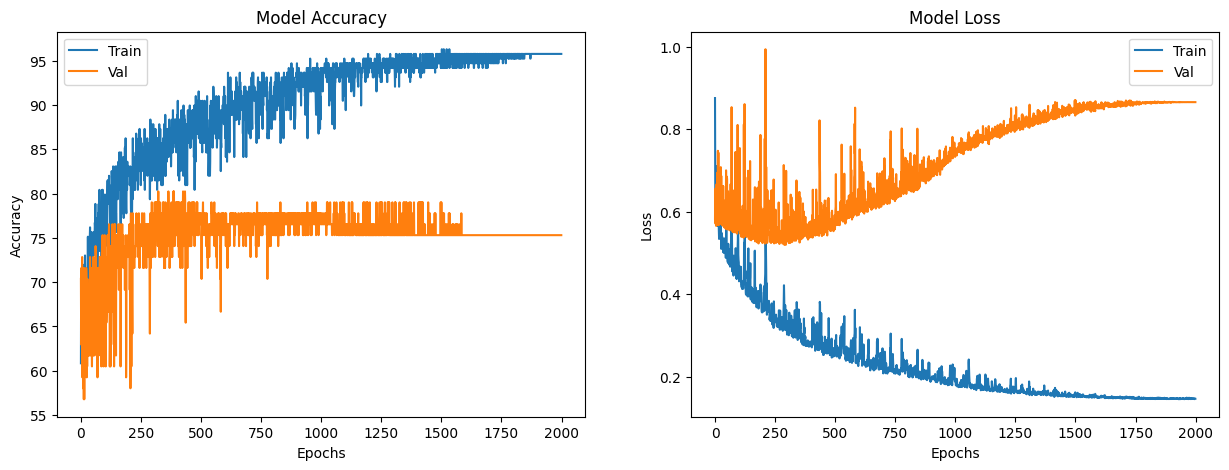

In [259]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [260]:
# read test file
test_data = pd.read_csv('heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [261]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [262]:
test_data = test_data.values
test_data.shape

(31, 14)

In [263]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [264]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0
total_test_loss = 0.0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)
        loss = criterion(outputs, labels)
        total_test_loss += loss.item()

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)
    avg_val_loss = total_test_loss / len(test_loader)

print(f'Test accuracy is {100. * test_correct / test_total}%, with loss {avg_val_loss}')

Test accuracy is 74.19354838709677%, with loss 0.5594894137654093


# Result Visualization

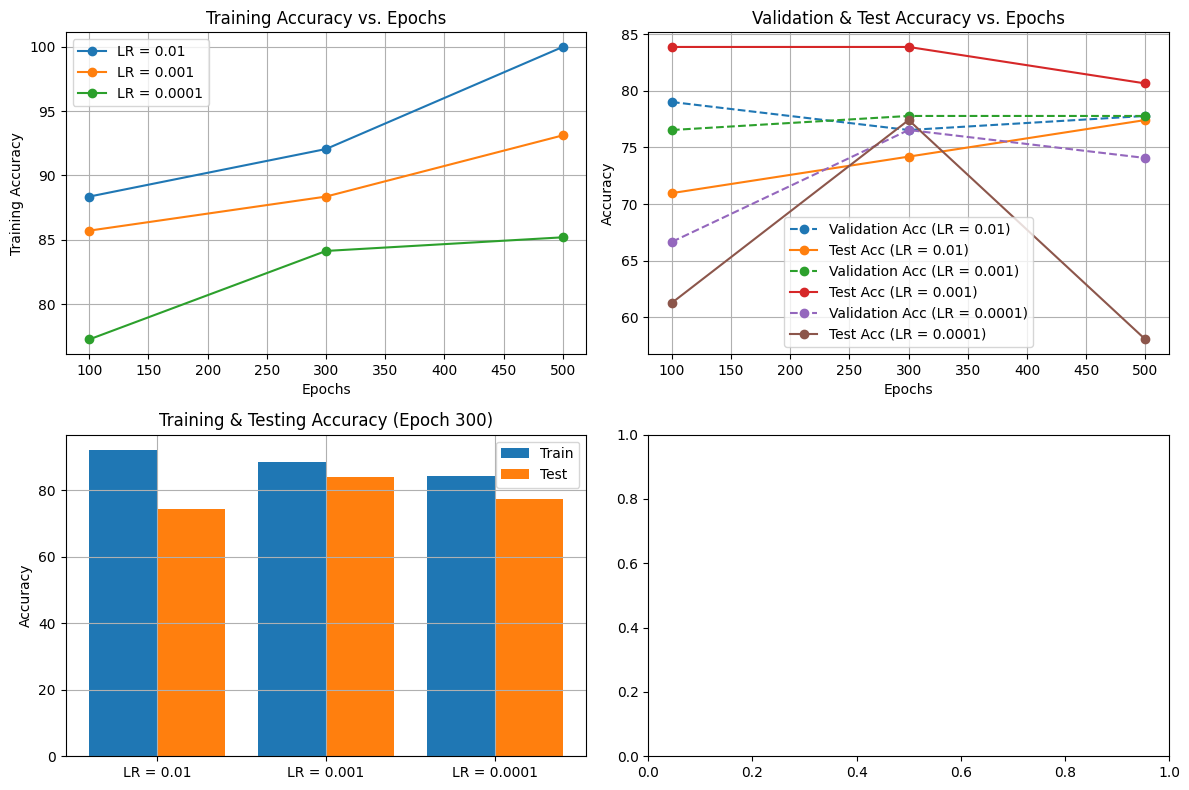

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 建立數據表
data = {
    "Learning Rate": [0.01, 0.001, 0.0001] * 3,
    "Epoch": [100] * 3 + [300] * 3 + [500] * 3,
    "Training Acc": [88.36, 85.71, 77.25, 92.06, 88.36, 84.13, 100.00, 93.12, 85.19],
    "Training Loss": [0.2317, 0.3426, 0.4749, 0.1713, 0.2320, 0.3755, 0.0297, 0.1753, 0.3121],
    "Valid Acc": [79.01, 76.54, 66.67, 76.54, 77.78, 76.54, 77.78, 77.78, 74.07],
    "Valid Loss": [0.6984, 0.5131, 0.5705, 0.8126, 0.6230, 0.5352, 2.2225, 0.8035, 0.5283],
    "Testing Acc": [70.97, 83.87, 61.29, 74.19, 83.87, 77.42, 77.42, 80.65, 58.06],
    "Testing Loss": [0.5203, 0.5647, 0.6705, 0.4601, 0.6497, 0.6171, 0.6281, 0.6920, 0.5887]
}
df = pd.DataFrame(data)

# 繪製圖表
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# 圖 1: 訓練準確率 vs. Epochs
for lr in df["Learning Rate"].unique():
    subset = df[df["Learning Rate"] == lr]
    axes[0].plot(subset["Epoch"], subset["Training Acc"], marker='o', label=f'LR = {lr}')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Training Accuracy")
axes[0].set_title("Training Accuracy vs. Epochs")
axes[0].legend()
axes[0].grid()

# 圖 2: 驗證與測試準確率 vs. Epochs
for lr in df["Learning Rate"].unique():
    subset = df[df["Learning Rate"] == lr]
    axes[1].plot(subset["Epoch"], subset["Valid Acc"], marker='o', linestyle='dashed', label=f'Validation Acc (LR = {lr})')
    axes[1].plot(subset["Epoch"], subset["Testing Acc"], marker='o', linestyle='solid', label=f'Test Acc (LR = {lr})')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Validation & Test Accuracy vs. Epochs")
axes[1].legend()
axes[1].grid()

# 圖 3: 訓練與測試準確率 (Epoch 300)
epoch_300 = df[df["Epoch"] == 300]
x = np.arange(len(epoch_300))
width = 0.4
axes[2].bar(x - width/2, epoch_300["Training Acc"], width, label="Train")
axes[2].bar(x + width/2, epoch_300["Testing Acc"], width, label="Test")
axes[2].set_xticks(x)
axes[2].set_xticklabels([f'LR = {lr}' for lr in epoch_300["Learning Rate"]])
axes[2].set_ylabel("Accuracy")
axes[2].set_title("Training & Testing Accuracy (Epoch 300)")
axes[2].legend()
axes[2].grid()

# 調整佈局
plt.tight_layout()
plt.show()
